###  Bussiness Understanding

- The Healthy Harvest is an online grocery retailer in India that started operation in 2015. Although they have been experiencing year on year revenue growth, their reviews have been bad. The two top complaints from their customers reviews are

    1. unavailability of desired products - This is largely due to under stocking which makes products runout fast during peak periods.
    2. bad quality / un-fresh products - This is largely due to over stocking which leads to products losing quality when they've stayed too long in stock.

### Bussiness Objectives

- In order to increase their customers satisfaction and reduce bad reviews, we at Resilient Analytics have been tasked to help them carry out a descriptive and predictive analysis of their data.

1. insights they want to see from the descriptive analysis:
    * Top 5 product categories with the most sales.
    * Sales trend over the years
    * Top 5 most profitable products
    

2. Predictive Analysis
    - Due to insufficient Stock Movement data, they haven't been able to project their stock level. However, they want us to help with their daily Sales Forecast as this can be combined with the insights gathered from the descriptive analysis to guide the business on the stock level to be kept daily based on the projected sales.

- NB - They want us to combine some public economic data that could be a factor that influences customers purchasing power such as CPI, Holidays, Temperature, Diesel Price, Petrol Prices.

### Metric of success

- The model accuracy is to be measured using the R-squared score. The client needs a model with an R_squared score > 0.7

### Experimental design

- To achieve the set objectives the documentation below details the steps that shall be followed

    1. Importing necesssary libraries
    2. Loading the all relevant datasets
    3. Joining Datasets appropiately to get a final dataset
    4. Cleaning the data
    5. Analysing the data using specified questions
    6. Modelling
    7. Applying ML models 
    8. Optimizing ML models
    9. Summary of Data Insights
    10. Conclusion
    11. Reccomednations

### Data Understanding

1. Category': This column indicates the category of product that was sold. This information can be used to understand which product categories are the most popular among customers and which are the most profitable for the retailer.


2. 'Product': This column indicates the specific product that was sold. This information can be used to understand which specific products are the most popular among customers and which are the most profitable for the retailer.


3. 'City': This column indicates the city in which the transaction occurred. This information can be used to understand which cities are the most important markets for the retailer and which have the most potential for growth.


4. 'OrderDate': This column indicates the date on which the transaction occurred. This information can be used to understand the seasonal patterns of sales and identify the busiest times of the year for the retailer.


5. 'Sales': This column indicates the total sales value of the transaction. This information is used to understand the overall performance of the retailer and to compare the performance of different product categories and products.


6. 'Discount': This column indicates the amount of discount offered on the product. This information can be used to understand how discounts affect sales and profitability.


7. 'Profit': This column indicates the profit made from the transaction. This information can be used to understand the overall profitability of the retailer and to compare the profitability of different product categories and products.


8. 'Quarter': This column indicates the quarter in which the transaction occurred. This information can be used to understand the seasonal patterns of sales and identify the busiest times of the year for the retailer.


9. 'Cpi': This column indicates the Consumer Price Index of the quarter in which the transaction occurred. This information can be used to understand the effect of inflation on sales and profitability.


10. 'DieselPrice': This column indicates the price of diesel fuel in the quarter in which the transaction occurred. This information can be used to understand the effect of fuel prices on sales and profitability.


11. 'PetrolPrice': This column indicates the price of petrol fuel in the quarter in which the transaction occurred. This information can be used to understand the effect of fuel prices on sales and profitability.


12. 'Temperature': This column indicates the average temperature in the city in which the transaction occurred in the quarter in which the transaction occurred. This information can be used to understand the effect of weather on sales and profitability.


13. 'Holiday': This column indicates whether the day of the transaction was a holiday or not. This information can be used to understand how holidays affect sales and profitability.

### Specifying question

1. which category of product is most profitable?
2. City with highest sales by product
3. which city returned the highest profit? which city returned losses to the company if any?
4. Total sales volume for each year? 
5. who are Most active customers by total purchases?
6. Most dicounted and profitable product category
7. correllation between features if any?
8. Sales volume by category for different timeframes
9. Do holidays affect sales volume?

## Importing libraries

In [1]:
# Importing necessary libraries

import pandas as pd
pd.options.plotting.backend = "plotly"
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from statsmodels.graphics import tsaplots
from sklearn.multioutput import RegressorChain, MultiOutputRegressor
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import ParameterGrid

In [2]:
# Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

## Importing datasets

In [4]:
# loading supermarkets grocery sales dataset

grocery_sales = pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset1.csv")

# previewing first five records of super market sales dataset

grocery_sales.head()

Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

        Order Date Region  Sales  Discount  Profit       State  Year  Quarter  \
0   11/8/2017 0:00  North   1254      0.12  401.28  Tamil Nadu  2017        4   
1   11/8/2017 0:00  South    749      0.18  149.80  Tamil Nadu  2017        4   
2   6/12/2017 0:00   West   2360      0.21  165.20  Tamil Nadu  2017        2   
3  10/11/2016 0:00  South    896      0.25   89.60  Tamil Nadu  2016        4   
4  10/11/2016 0:00  South   2355      0.26  918.45  Tamil Nadu  2016        4   

      Month  Weak of year  Weak of month Day of week  Day of year  
0  November            45              2   Wednesday          312  
1  November            45              2   Wednesday          312  
2      June            24              3      Monday          163  
3   October            42              3     Tuesday          285  
4   October            42              3     Tuesday          285

In [5]:
# loading CPi dataset

cpi = pd.read_csv('CPI - India.csv')

# loading diesel prices dataset

diesel = pd.read_csv('diesel.csv')

# loading petrol price dataset

petrol = pd.read_csv('petrol.csv')

# loading  temparture data of tamil nadu

temp = pd.read_csv('temperatures.csv')

# loading indian holidays dataset

holidays = pd.read_csv('2018 - Holidays.csv')

## Data Preparation

### Joining grocery sales data to CPI dataset

In [6]:
# Joining grocery sales data  to cpi data on year column

df_merged = pd.merge(grocery_sales, cpi, on='Year', how='inner')
  
# Previewing the first five records

df_merged.head()

Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3     OD14          Peer  Fruits & Veggies  Fresh Vegetables  Kanyakumari   
4     OD22          Alan       Food Grains     Dals & Pulses        Karur   

       Order Date   Region  Sales  Discount  Profit       State  Year  \
0  11/8/2017 0:00    North   1254      0.12  401.28  Tamil Nadu  2017   
1  11/8/2017 0:00    South    749      0.18  149.80  Tamil Nadu  2017   
2  6/12/2017 0:00     West   2360      0.21  165.20  Tamil Nadu  2017   
3  12/5/2017 0:00     West   1277      0.25   63.85  Tamil Nadu  2017   
4  12/9/2017 0:00  Central    948      0.13   47.40  Tamil Nadu  2017   

   Quarter     Month  Weak of year  Weak of month Day of week  Day of year  \
0        4  November            45              2   Wednesday          312   
1        4  November            45              2   Wednesday          312   
2        2      June            24              3      Monday          163   
3        4  December            49              2     Tuesday          339   
4        4  December            49              2    Saturday          343   

        CPI  
0  3.328173  
1  3.328173  
2  3.328173  
3  3.328173  
4  3.328173

### Joining to deisel price data

In [7]:
# Extracting the Year column from diesel price data

diesel['Year'] = pd.DatetimeIndex(diesel['date']).year

# Extracting the Month column from diesel price data

diesel['Month'] = pd.DatetimeIndex(diesel['date']).month

# extracting the year column from merged dataset ("df_merged")

df_merged['Month'] = pd.DatetimeIndex(df_merged['Order Date']).month

# extracting fuel price data only for "Tamil Nadu" state

tamil_nadu = diesel[diesel['state'] == 'Tamil Nadu']

# getting a mean price rate for diesel prices for Tamil Nadu

tamil_diesel_grouped = tamil_nadu.groupby(['Year', 'Month'])['rate'].mean()


In [8]:
# converting the grouped data from series to Dataframe

tamil_diesel_grouped1 = tamil_diesel_grouped.to_frame()

# previewing a sample of 10 records of the grouped data

tamil_diesel_grouped1.sample(10)


rate
Year Month           
2003 8      22.670000
2015 4      50.910000
2013 7      54.150000
2010 4      38.050000
2004 6      25.350000
2002 7      20.060000
2006 12     34.410000
2020 12     79.367419
2014 7      61.700000
2018 8      73.145455

In [9]:
# resting the index of the grouped data 

tamil_diesel_grouped1 = tamil_diesel_grouped1.reset_index()

# renaming the columns of the dataframe

tamil_diesel_grouped1 = tamil_diesel_grouped1.rename(columns = {'rate': 'Diesel_Price'})

In [10]:
# Joining the diesel price data to the df_merged dataset on Year and month

df_merged1 = pd.merge(df_merged, tamil_diesel_grouped1, on=['Year', 'Month'])
  
# Previewing a sample of 10 records of the merged data

df_merged1.sample(10)

Order ID Customer Name           Category       Sub Category  \
9449   OD7118       Rumaiza          Beverages      Health Drinks   
22      OD844         Akash        Food Grains               Rice   
7309   OD9659        Ganesh        Food Grains      Dals & Pulses   
9703   OD7615         Vidya          Beverages      Health Drinks   
350    OD9465         Shree             Snacks            Noodles   
37     OD1327         Kumar        Food Grains      Dals & Pulses   
5855   OD2617         Surya       Oil & Masala  Edible Oil & Ghee   
8579   OD7544         Sudha  Eggs, Meat & Fish               Fish   
8198   OD8609        Ganesh             Snacks            Cookies   
6708   OD5892        Harish        Food Grains      Dals & Pulses   

             City       Order Date   Region  Sales  Discount  Profit  \
9449   Dharmapuri   3/26/2018 0:00  Central    783      0.28   39.15   
22        Madurai   11/7/2017 0:00     West   2386      0.29  858.96   
7309   Pudukottai   10/5/2018 0:00     West   1848      0.33  702.24   
9703   Pudukottai   8/17/2018 0:00     West   1920      0.32  576.00   
350   Kanyakumari  11/24/2017 0:00    South    727      0.21  268.99   
37     Coimbatore   11/3/2017 0:00    South   1656      0.23  165.60   
5855  Krishnagiri    9/7/2015 0:00  Central    687      0.34  103.05   
8579      Tenkasi  11/24/2018 0:00    South   1833      0.10  238.29   
8198  Tirunelveli  12/14/2018 0:00     East   2063      0.12  247.56   
6708      Chennai    4/8/2018 0:00  Central   2317      0.11  718.27   

           State  Year  Quarter  Month  Weak of year  Weak of month  \
9449  Tamil Nadu  2018        1      3            13              5   
22    Tamil Nadu  2017        4     11            45              2   
7309  Tamil Nadu  2018        4     10            40              1   
9703  Tamil Nadu  2018        3      8            33              3   
350   Tamil Nadu  2017        4     11            47              4   
37    Tamil Nadu  2017        4     11            44              1   
5855  Tamil Nadu  2015        3      9            37              2   
8579  Tamil Nadu  2018        4     11            47              4   
8198  Tamil Nadu  2018        4     12            50              3   
6708  Tamil Nadu  2018        2      4            15              2   

     Day of week  Day of year       CPI  Diesel_Price  
9449      Monday           85  3.938826     66.818276  
22       Tuesday          311  3.328173     61.523103  
7309      Friday          278  3.938826     79.314211  
9703      Friday          229  3.938826     73.145455  
350       Friday          328  3.328173     61.523103  
37        Friday          307  3.328173     61.523103  
5855      Monday          250  4.906973     45.560000  
8579    Saturday          328  3.938826     75.498654  
8198      Friday          348  3.938826     68.854839  
6708      Sunday           98  3.938826     69.039474

### Merging grocery sales data to petrol price data

In [11]:
# Extracting the Year column from petrol price data

petrol['Year'] = pd.DatetimeIndex(petrol['date']).year

# Extracting the Month column from petrol price data

petrol['Month'] = pd.DatetimeIndex(petrol['date']).month

# extracting fuel price data only for "Tamil Nadu" state

tamil_nadu = petrol[petrol['state'] == 'Tamil Nadu']

# getting a mean price rate for petrol prices for Tamil Nadu

tamil_petrol_grouped = tamil_nadu.groupby(['Year', 'Month'])['rate'].mean()


In [12]:
# converting the grouped data from series to Dataframe

tamil_petrol_grouped1 = tamil_petrol_grouped.to_frame()

# previewing a sample of 10 records of the grouped data

tamil_petrol_grouped1.sample(10)


rate
Year Month           
2003 6      33.110000
2013 2      72.170000
2003 2      33.990000
2018 2      75.171176
2019 12     77.804706
     7      75.663750
2018 3      75.164118
2020 6      79.878333
2014 1      75.710000
2020 7      83.620000

In [14]:
# resting the index of the grouped data 

tamil_petrol_grouped1 = tamil_petrol_grouped1.reset_index()

# renaming the columns of the dataframe

tamil_petrol_grouped1 = tamil_petrol_grouped1.rename(columns = {'rate': 'petrol_Price'})

In [15]:
# Joining the petrol price data to the df_merged dataset on Year and month

df_merged1 = pd.merge(df_merged1, tamil_petrol_grouped1, on=['Year', 'Month'])
  
# previewing a sample of 10 records from merged dataset

df_merged1.sample(10)

Order ID Customer Name           Category        Sub Category  \
5328   OD9829        Arutra   Fruits & Veggies    Fresh Vegetables   
320    OD8738           Ram   Fruits & Veggies        Fresh Fruits   
1871   OD7829         Malik             Bakery            Biscuits   
8957   OD7115        Amrish   Fruits & Veggies    Fresh Vegetables   
3181   OD7137         Akash        Food Grains        Atta & Flour   
2782   OD3352           Ram  Eggs, Meat & Fish                Fish   
1879   OD8561        Sharon          Beverages       Health Drinks   
5429   OD3288         Verma   Fruits & Veggies  Organic Vegetables   
6818   OD7877         Vince       Oil & Masala             Masalas   
8893   OD4034         Malik        Food Grains     Organic Staples   

            City       Order Date   Region  Sales  Discount  Profit  \
5328        Bodi    8/2/2015 0:00  Central   1227      0.33  355.83   
320         Ooty  11/26/2017 0:00     East   1103      0.33  143.39   
1871  Coimbatore   4/10/2017 0:00     West   1548      0.11  170.28   
8957    Namakkal    6/4/2018 0:00  Central   1324      0.35  251.56   
3181      Cumbum   9/10/2016 0:00     East   1910      0.21  362.90   
2782   Nagercoil   11/7/2016 0:00  Central   1494      0.22  373.50   
1879       Theni   4/30/2017 0:00  Central   1425      0.32  541.50   
5429       Karur  12/22/2015 0:00  Central    862      0.31  370.66   
6818      Trichy    7/5/2018 0:00  Central    882      0.35  211.68   
8893        Bodi    6/4/2018 0:00    South    972      0.30  174.96   

           State  Year  Quarter  Month  Weak of year  Weak of month  \
5328  Tamil Nadu  2015        3      8            32              2   
320   Tamil Nadu  2017        4     11            48              5   
1871  Tamil Nadu  2017        2      4            15              3   
8957  Tamil Nadu  2018        2      6            23              2   
3181  Tamil Nadu  2016        3      9            37              2   
2782  Tamil Nadu  2016        4     11            46              2   
1879  Tamil Nadu  2017        2      4            18              6   
5429  Tamil Nadu  2015        4     12            52              4   
6818  Tamil Nadu  2018        3      7            27              1   
8893  Tamil Nadu  2018        2      6            23              2   

     Day of week  Day of year       CPI  Diesel_Price  index  petrol_Price  
5328      Sunday          214  4.906973     46.690000     73     64.130000  
320       Sunday          330  3.328173     61.523103     98     72.068095  
1871      Monday          100  3.328173     59.783333     91     70.105000  
8957      Monday          155  3.938826     72.348983    105     79.847500  
3181    Saturday          254  4.948216     54.520000     85     63.260000  
2782      Monday          312  4.948216     57.410000     87     66.160000  
1879      Sunday          120  3.328173     59.783333     91     70.105000  
5429     Tuesday          356  4.906973     47.525000     76     60.540000  
6818    Thursday          186  3.938826     72.196154    106     79.322500  
8893      Monday          155  3.938826     72.348983    105     79.847500

### Joining the grocery sales data to Temprature data

In [16]:
# Temprature data shall be merged on year and month hence month names need to be aligned to be similar with month names in grocery sales dataset

# Getting a list of the month names in temprature dataset

temp['Month'].unique().tolist()

['JAN',
 'FEB',
 'MAR',
 'APR',
 'MAY',
 'JUN',
 'JUL',
 'AUG',
 'SEP',
 'OCT',
 'NOV',
 'DEC',
 'ANNUAL',
 'JAN-FEB',
 'MAR-MAY',
 'JUN-SEP',
 'OCT-DEC']

In [17]:
# Selecting temprature data for different months excluding data for quarters

temp1 = temp[temp['Month'].isin(['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'])]

# Previwing a sample of 10 records

temp1.head(12)

Year Month  Temprature
0   2014   JAN       23.83
1   2014   FEB       25.97
2   2014   MAR       28.95
3   2014   APR       32.74
4   2014   MAY       33.77
5   2014   JUN       34.15
6   2014   JUL       31.85
7   2014   AUG       31.32
8   2014   SEP       30.68
9   2014   OCT       30.29
10  2014   NOV       28.05
11  2014   DEC       25.08

In [18]:
# create a copy of the dataframe to avoid modifying the original

temp1 = temp1.copy() 

# Creating a list of month names using abbreviations

month_names = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']

# Creating a dictionary with month names as keys and their corresponding numerical values as values

month_dict = {v:f'{k:02d}' for k,v in enumerate(month_names, start=1)}

# Replacing the month names in the 'Month' column of temp1 dataframe with numerical values

# temp1['Month'] = temp1['Month'].map(month_dict)
temp1.loc[:,'Month'] = temp1['Month'].map(month_dict)


In [19]:
# create a copy of the dataframe to avoid modifying the original

temp1 = temp1.copy() 

# Replacing all the null values in the 'Month' column with 0

temp1['Month'] = temp1['Month'].fillna(0)

# Changing the datatype of the 'Month' column to integer

temp1['Month'] = temp1['Month'].astype(int)


In [20]:
# Merging the df_merged1 and temp1 dataframe on 'Year' and 'Month' columns

df_merged1 = pd.merge(df_merged1, temp1, on=['Year', 'Month'])

# Displaying a random sample of 10 rows from the resulting dataframe

df_merged1.sample(10)


Order ID Customer Name           Category   Sub Category         City  \
9319   OD8182         Komal       Oil & Masala        Masalas   Pudukottai   
3146   OD5907         Vidya  Eggs, Meat & Fish           Fish   Coimbatore   
4127   OD3573        Sheeba             Snacks     Chocolates         Bodi   
3897   OD5814          Ravi  Eggs, Meat & Fish         Mutton  Krishnagiri   
3289     OD40       Sabeela  Eggs, Meat & Fish        Chicken       Cumbum   
201    OD5520         Kumar        Food Grains   Atta & Flour      Vellore   
5424   OD3063        Adavan        Food Grains   Atta & Flour  Tirunelveli   
3305    OD471         Yadav          Beverages    Soft Drinks        Karur   
4649   OD1636         Sudha       Oil & Masala        Masalas        Karur   
8056   OD8993        Muneer             Bakery  Breads & Buns      Madurai   

           Order Date   Region  Sales  Discount  Profit       State  Year  \
9319   3/12/2018 0:00     East   1852      0.25  129.64  Tamil Nadu  2018   
3146   9/10/2016 0:00  Central    988      0.23  256.88  Tamil Nadu  2016   
4127   2/25/2016 0:00     East   1756      0.14  456.56  Tamil Nadu  2016   
3897    3/5/2016 0:00     East   1280      0.25  371.20  Tamil Nadu  2016   
3289  12/27/2016 0:00  Central   2045      0.23  879.35  Tamil Nadu  2016   
201   11/18/2017 0:00     West   1252      0.14  112.68  Tamil Nadu  2017   
5424  12/13/2015 0:00     West   1295      0.35  142.45  Tamil Nadu  2015   
3305  12/20/2016 0:00     East    502      0.25   80.32  Tamil Nadu  2016   
4649   6/21/2015 0:00     East   2101      0.15  735.35  Tamil Nadu  2015   
8056  12/25/2018 0:00    South   1284      0.32  295.32  Tamil Nadu  2018   

      Quarter  Month  Weak of year  Weak of month Day of week  Day of year  \
9319        1      3            11              3      Monday           71   
3146        3      9            37              2    Saturday          254   
4127        1      2             9              4    Thursday           56   
3897        1      3            10              1    Saturday           65   
3289        4     12            53              5     Tuesday          362   
201         4     11            46              3    Saturday          322   
5424        4     12            51              3      Sunday          347   
3305        4     12            52              4     Tuesday          355   
4649        2      6            26              4      Sunday          172   
8056        4     12            52              5     Tuesday          359   

           CPI  Diesel_Price  index  petrol_Price  Temprature  
9319  3.938826     66.818276    102     75.164118       31.60  
3146  4.948216     54.520000     85     63.260000       31.66  
4127  4.948216     45.610000     78     59.260000       29.72  
3897  4.948216     47.852857     79     57.093333       32.62  
3289  4.948216     57.468333     88     66.890000       28.01  
201   3.328173     61.523103     98     72.068095       29.60  
5424  4.906973     47.525000     76     60.540000       25.67  
3305  4.948216     57.468333     88     66.890000       28.01  
4649  4.906973     54.290000     71     70.120000       32.48  
8056  3.938826     68.854839    111     73.292941       27.18

### Merging holiday data to grocery sales data

In [21]:
# Creating a new 'Month' column in the holidays dataframe
# by extracting the month from the 'date' column

holidays['Month'] = pd.DatetimeIndex(holidays['date']).month


In [22]:
# Converting the 'date' column to datetime format

holidays['date']= pd.to_datetime(holidays['date'])

# Checking the format of 'date' column

holidays.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          47 non-null     datetime64[ns]
 1   day           47 non-null     object        
 2   holiday       47 non-null     object        
 3   holiday_type  47 non-null     object        
 4   Month         47 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.0+ KB


In [23]:
# Creating a new 'Day_of_month' column in the holidays dataframe
# by extracting the day of the month from the 'date' column

holidays['Day_of_month'] = holidays['date'].dt.day

# Displaying a random sample of 10 rows from the resulting dataframe

holidays.sample(10)

date       day                                            holiday  \
1  2018-01-14    Sunday                                Makar Sankranti (R)   
39 2018-11-08  Thursday                                 Govardhan Puja (R)   
10 2018-03-18    Sunday  Chaitra Sukladi/Gudi Padava/Ugadi/Cheti Chand (R)   
20 2018-06-16  Saturday                                     Idu'l Fitr (G)   
12 2018-03-29  Thursday                                Mahavir Jayanti (G)   
25 2018-08-25  Saturday                         Onam or Thiru Onam Day (R)   
45 2018-12-24    Monday                                  Christmas Eve (R)   
19 2018-06-15    Friday                                  Jamat-Ul-Vida (R)   
27 2018-09-03    Monday                                    Janmashtami (G)   
9  2018-03-02    Friday                                           Holi (G)   

   holiday_type  Month  Day_of_month  
1    Restricted      1            14  
39   Restricted     11             8  
10   Restricted      3            18  
20     Gazetted      6            16  
12     Gazetted      3            29  
25   Restricted      8            25  
45   Restricted     12            24  
19   Restricted      6            15  
27     Gazetted      9             3  
9      Gazetted      3             2

In [24]:
#Converting the 'Order Date' column to datetime format

df_merged1['Order Date'] = pd.to_datetime(df_merged1['Order Date'])

#Checking the format of 'Order Date' column

df_merged1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 0 to 9751
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9752 non-null   object        
 1   Customer Name  9752 non-null   object        
 2   Category       9752 non-null   object        
 3   Sub Category   9752 non-null   object        
 4   City           9752 non-null   object        
 5   Order Date     9752 non-null   datetime64[ns]
 6   Region         9752 non-null   object        
 7   Sales          9752 non-null   int64         
 8   Discount       9752 non-null   float64       
 9   Profit         9752 non-null   float64       
 10  State          9752 non-null   object        
 11  Year           9752 non-null   int64         
 12  Quarter        9752 non-null   int64         
 13  Month          9752 non-null   int64         
 14  Weak of year   9752 non-null   int64         
 15  Weak of month  9752 n

In [25]:
#Creating a new column 'Day_of_month' by extracting the day of month from 'Order Date' column

df_merged1['Day_of_month'] = df_merged1['Order Date'].dt.day

#Displaying a random sample of 10 rows to check the new column

df_merged1.sample(10)


Order ID Customer Name           Category    Sub Category  \
1821   OD3869         Malik             Snacks         Noodles   
6071   OD2448         Shree        Food Grains            Rice   
4883   OD4893          Alan             Snacks         Cookies   
3343   OD1832       Hussain  Eggs, Meat & Fish         Chicken   
1849   OD6017       Hussain       Oil & Masala         Masalas   
8046   OD8809        Sharon             Bakery           Cakes   
2839   OD5042         Kumar  Eggs, Meat & Fish            Fish   
4016   OD3945         Vidya       Oil & Masala         Masalas   
8480   OD8683        Arutra   Fruits & Veggies  Organic Fruits   
9568   OD8581        Mathew          Beverages     Soft Drinks   

                City Order Date   Region  Sales  Discount  Profit       State  \
1821         Vellore 2017-04-07     East   1361      0.34  340.25  Tamil Nadu   
6071            Ooty 2015-07-05  Central   1848      0.17  332.64  Tamil Nadu   
4883        Dindigul 2015-11-23     West   1957      0.32  841.51  Tamil Nadu   
3343  Ramanadhapuram 2016-12-14     West   1280      0.28  140.80  Tamil Nadu   
1849      Perambalur 2017-04-07     East    806      0.24  314.34  Tamil Nadu   
8046            Bodi 2018-12-17     West   2243      0.20  314.02  Tamil Nadu   
2839            Bodi 2016-11-09     East   1768      0.17  335.92  Tamil Nadu   
4016            Bodi 2016-05-03     East   2399      0.13  479.80  Tamil Nadu   
8480         Tenkasi 2018-11-10     West    558      0.19   50.22  Tamil Nadu   
9568      Perambalur 2018-08-21     East   1631      0.25  685.02  Tamil Nadu   

      Year  Quarter  Month  Weak of year  Weak of month Day of week  \
1821  2017        2      4            14              2      Friday   
6071  2015        3      7            28              2      Sunday   
4883  2015        4     11            48              4      Monday   
3343  2016        4     12            51              3   Wednesday   
1849  2017        2      4            14              2      Friday   
8046  2018        4     12            51              4      Monday   
2839  2016        4     11            46              2   Wednesday   
4016  2016        2      5            19              1     Tuesday   
8480  2018        4     11            45              2    Saturday   
9568  2018        3      8            34              4     Tuesday   

      Day of year       CPI  Diesel_Price  index  petrol_Price  Temprature  \
1821           97  3.328173     59.783333     91     70.105000       34.95   
6071          186  4.906973     52.300000     72     68.990000       31.88   
4883          327  4.906973     47.550000     75     61.200000       28.10   
3343          349  4.948216     57.468333     88     66.890000       28.01   
1849           97  3.328173     59.783333     91     70.105000       34.95   
8046          351  3.938826     68.854839    111     73.292941       27.18   
2839          314  4.948216     57.410000     87     66.160000       30.11   
4016          124  4.948216     52.705000     81     62.055000       35.72   
8480          314  3.938826     75.498654    110     79.348235       29.60   
9568          233  3.938826     73.145455    107     79.836250       31.72   

      Day_of_month  
1821             7  
6071             5  
4883            23  
3343            14  
1849             7  
8046            17  
2839             9  
4016             3  
8480            10  
9568            21

In [26]:
# Merging the df_merged1 and holidays dataframe on 'Month' and 'Day_of_month' columns using outer join

df_merged1 = pd.merge(df_merged1, holidays, on=['Month', 'Day_of_month'], how = 'outer')

# Displaying a random sample of 10 rows from the resulting dataframe

df_merged1.sample(10)


Order ID Customer Name           Category     Sub Category          City  \
9495   OD6007         Sudha        Food Grains    Dals & Pulses       Tenkasi   
5334   OD2856          Ravi  Eggs, Meat & Fish             Eggs   Kanyakumari   
9558   OD1363        Sudeep   Fruits & Veggies   Organic Fruits  Virudhunagar   
916    OD2136         Hafiz  Eggs, Meat & Fish           Mutton          Ooty   
7055   OD4620         Yusuf             Snacks          Cookies   Kanyakumari   
6812   OD5484       Hussain             Snacks          Cookies  Virudhunagar   
7898   OD1895         Kumar             Bakery            Cakes       Tenkasi   
6591   OD4230        Sharon        Food Grains  Organic Staples       Madurai   
3247     OD39         Jonas   Fruits & Veggies     Fresh Fruits       Chennai   
4829   OD1627        Arutra             Bakery         Biscuits   Kanyakumari   

     Order Date   Region  Sales  Discount  Profit       State  Year  Quarter  \
9495 2015-07-11     East    754      0.29  294.06  Tamil Nadu  2015        3   
5334 2016-09-26     East    839      0.25   50.34  Tamil Nadu  2016        3   
9558 2018-07-27     West    541      0.13   27.05  Tamil Nadu  2018        3   
916  2017-11-27     East   2389      0.21  692.81  Tamil Nadu  2017        4   
7055 2018-08-21     West    515      0.30   30.90  Tamil Nadu  2018        3   
6812 2017-08-15    South   1257      0.11   75.42  Tamil Nadu  2017        3   
7898 2018-10-07     West   1878      0.26  225.36  Tamil Nadu  2018        4   
6591 2017-04-16    South    790      0.32   71.10  Tamil Nadu  2017        2   
3247 2016-12-27  Central   1751      0.19  280.16  Tamil Nadu  2016        4   
4829 2015-03-25     East   1864      0.18  428.72  Tamil Nadu  2015        1   

      Month  Weak of year  Weak of month Day of week  Day of year       CPI  \
9495      7            28              2    Saturday          192  4.906973   
5334      9            40              5      Monday          270  4.948216   
9558      7            30              4      Friday          208  3.938826   
916      11            48              5      Monday          331  3.328173   
7055      8            34              4     Tuesday          233  3.938826   
6812      8            33              3     Tuesday          227  3.328173   
7898     10            41              2      Sunday          280  3.938826   
6591      4            16              4      Sunday          106  3.328173   
3247     12            53              5     Tuesday          362  4.948216   
4829      3            13              4   Wednesday           84  4.906973   

      Diesel_Price  index  petrol_Price  Temprature  Day_of_month       date  \
9495     52.300000     72     68.990000       31.88            11        NaT   
5334     54.520000     85     63.260000       31.66            26        NaT   
9558     72.196154    106     79.322500       31.88            27        NaT   
916      61.523103     98     72.068095       29.60            27        NaT   
7055     73.145455    107     79.836250       31.72            21        NaT   
6812     59.967000     95     70.214000       31.72            15 2018-08-15   
7898     79.314211    109     85.293043       32.29             7        NaT   
6591     59.783333     91     70.105000       34.95            16        NaT   
3247     57.468333     88     66.890000       28.01            27        NaT   
4829     52.920000     68     63.310000       29.07            25 2018-03-25   

            day               holiday holiday_type  
9495        NaN                   NaN          NaN  
5334        NaN                   NaN          NaN  
9558        NaN                   NaN          NaN  
916         NaN                   NaN          NaN  
7055        NaN                   NaN          NaN  
6812  Wednesday  Independence day (G)     Gazetted  
7898        NaN                   NaN          NaN  
6591        NaN                   NaN          NaN  
3247

### Removing unneccessary columns

In [27]:
# Dropping the 'date', 'day' and 'holiday_type' columns from the df_merged1 dataframe

df_final =df_merged1.drop(columns = ['date', 'day', 'holiday_type'])


# Displaying a random sample of 10 rows from the resulting dataframe

df_final.sample(10)

Order ID Customer Name           Category        Sub Category  \
4090   OD9235        Suresh  Eggs, Meat & Fish              Mutton   
3691    OD600        Adavan   Fruits & Veggies    Fresh Vegetables   
8206   OD8376        Sundar       Oil & Masala              Spices   
2140   OD3718         Yusuf             Bakery       Breads & Buns   
4263   OD8630         Hafiz             Snacks          Chocolates   
2720   OD7994      Krithika       Oil & Masala   Edible Oil & Ghee   
186     OD560         Kumar  Eggs, Meat & Fish                Fish   
3634   OD4061       Haseena   Fruits & Veggies  Organic Vegetables   
2814   OD2049       Ridhesh             Snacks             Cookies   
9468   OD3531           Amy          Beverages         Soft Drinks   

                City Order Date   Region  Sales  Discount  Profit       State  \
4090           Karur 2018-07-03     East   2405      0.19  721.50  Tamil Nadu   
3691           Karur 2017-07-16     East   1963      0.27  392.60  Tamil Nadu   
8206         Vellore 2015-05-28     West   2115      0.35  148.05  Tamil Nadu   
2140            Ooty 2017-12-09     East   1800      0.25  108.00  Tamil Nadu   
4263      Viluppuram 2017-03-11    South   1353      0.13  311.19  Tamil Nadu   
2720      Viluppuram 2015-12-30  Central   1116      0.27   89.28  Tamil Nadu   
186      Tirunelveli 2018-11-20     West    768      0.25  268.80  Tamil Nadu   
3634        Dindigul 2018-01-24    South    703      0.30   49.21  Tamil Nadu   
2814           Theni 2017-12-29  Central   1445      0.23  346.80  Tamil Nadu   
9468  Ramanadhapuram 2015-07-26  Central   1409      0.31  591.78  Tamil Nadu   

      Year  Quarter  Month  Weak of year  Weak of month Day of week  \
4090  2018        3      7            27              1     Tuesday   
3691  2017        3      7            29              4      Sunday   
8206  2015        2      5            22              5    Thursday   
2140  2017        4     12            49              2    Saturday   
4263  2017        1      3            10              2    Saturday   
2720  2015        4     12            53              5   Wednesday   
186   2018        4     11            47              4     Tuesday   
3634  2018        1      1             4              4   Wednesday   
2814  2017        4     12            52              5      Friday   
9468  2015        3      7            31              5      Sunday   

      Day of year       CPI  Diesel_Price  index  petrol_Price  Temprature  \
4090          184  3.938826     72.196154    106     79.322500       31.88   
3691          197  3.328173     57.667586     94     66.497143       31.88   
8206          148  4.906973     54.250000     70     68.765000       34.09   
2140          343  3.328173     61.975926     99     71.897647       27.18   
4263           70  3.328173     62.746667     90     74.280000       31.60   
2720          364  4.906973     47.525000     76     60.540000       25.67   
186           324  3.938826     75.498654    110     79.348235       29.60   
3634           24  3.938826     65.729310    100     73.892500       26.45   
2814          363  3.328173     61.975926     99     71.897647       27.18   
9468          207  4.906973     52.300000     72     68.990000       31.88   

      Day_of_month holiday  
4090             3     NaN  
3691            16     NaN  
8206            28     NaN  
2140             9     NaN  
4263            11     NaN  
2720            30     NaN  
186             20     NaN  
3634            24     NaN  
2814            29     NaN  
9468            26     NaN

In [28]:
# filling resulting null values in holiday column with '0'

df_final = df_final.fillna('0')

In [29]:
# Checking the shape of the resulting dataframe

df_final.shape

(9752, 25)

### Feature engineering

In [30]:
# Defining a function that will convert the values in the 'holiday' column

def holiday(value):

    if value == '0': # If the value is '0' then return 0
        return 0
    
    else: # Otherwise return 1
        return 1


In [31]:
# Applying the holiday function to the 'holiday' column of the df_final dataframe

df_final['holiday'] = df_final['holiday'].apply(holiday)

# Checking the unique values of the 'holiday' column after the function is applied

df_final['holiday'].unique()

array([1, 0], dtype=int64)

In [32]:
# Displaying a random sample of 10 rows from the resulting dataframe

df_final.sample(10)

Order ID Customer Name          Category        Sub Category  \
8727    OD423         Malik            Bakery       Breads & Buns   
3831   OD4318         Komal            Snacks             Cookies   
445    OD1802          Ravi         Beverages         Soft Drinks   
5367   OD8642         Shree            Snacks             Cookies   
2744   OD6565         Veena  Fruits & Veggies        Fresh Fruits   
8078   OD1236        Amrish  Fruits & Veggies        Fresh Fruits   
3686   OD9282        Muneer  Fruits & Veggies  Organic Vegetables   
3489   OD1778          Shah            Bakery       Breads & Buns   
8132   OD8836         Sudha  Fruits & Veggies  Organic Vegetables   
2477   OD7148         Vinne  Fruits & Veggies      Organic Fruits   

              City Order Date   Region  Sales  Discount  Profit       State  \
8727      Namakkal 2018-10-19     East   1356      0.27  501.72  Tamil Nadu   
3831       Chennai 2017-07-07     West    874      0.26  305.90  Tamil Nadu   
445        Chennai 2018-11-19     West   1364      0.35  409.20  Tamil Nadu   
5367        Trichy 2018-09-26    South   1390      0.32  500.40  Tamil Nadu   
2744       Vellore 2016-12-19  Central   1129      0.13  158.06  Tamil Nadu   
8078        Cumbum 2018-05-30  Central   1336      0.26  440.88  Tamil Nadu   
3686    Perambalur 2018-07-17     East   2160      0.33  453.60  Tamil Nadu   
3489      Namakkal 2018-01-30    South    892      0.33  205.16  Tamil Nadu   
8132    Pudukottai 2017-05-20     West   1458      0.12  320.76  Tamil Nadu   
2477  Virudhunagar 2017-12-18     East   1724      0.17  120.68  Tamil Nadu   

      Year  Quarter  Month  Weak of year  Weak of month Day of week  \
8727  2018        4     10            42              3      Friday   
3831  2017        3      7            27              2      Friday   
445   2018        4     11            47              4      Monday   
5367  2018        3      9            39              5   Wednesday   
2744  2016        4     12            52              4      Monday   
8078  2018        2      5            22              5   Wednesday   
3686  2018        3      7            29              3     Tuesday   
3489  2018        1      1             5              5     Tuesday   
8132  2017        2      5            20              3    Saturday   
2477  2017        4     12            51              4      Monday   

      Day of year       CPI  Diesel_Price  index  petrol_Price  Temprature  \
8727          292  3.938826     79.314211    109     85.293043       32.29   
3831          188  3.328173     57.667586     94     66.497143       31.88   
445           323  3.938826     75.498654    110     79.348235       29.60   
5367          269  3.938826     77.879167    108     84.916000       32.22   
2744          354  4.948216     57.468333     88     66.890000       28.01   
8078          150  3.938826     72.082667    104     79.758000       35.84   
3686          198  3.938826     72.196154    106     79.322500       31.88   
3489           30  3.938826     65.729310    100     73.892500       26.45   
8132          140  3.328173     59.668333     92     69.620000       35.84   
2477          352  3.328173     61.975926     99     71.897647       27.18   

      Day_of_month  holiday  
8727            19        1  
3831             7        0  
445             19        0  
5367            26        0  
2744            19        0  
8078            30        0  
3686            17        0  
3489            30        0  
8132            20        0  
2477            18        0

In [33]:
#Checking the frequency count of values in the 'holiday' column

df_final['holiday'].value_counts()


0    8438
1    1314
Name: holiday, dtype: int64

### Saving Dataframe

In [34]:
# Saving the df_final dataframe to a CSV file

df_final.to_csv('Final_df.csv')


## data exploration

In [35]:
# Finding the shape of df_final dataframe

rows, columns = df_final.shape

# Printing the number of rows and columns in the dataframe

print(f'The dataset has {rows} rows and {columns} columns')


The dataset has 9752 rows and 25 columns


In [36]:
# Checking the data types of each column in the df_final dataframe

df_final.dtypes


Order ID                 object
Customer Name            object
Category                 object
Sub Category             object
City                     object
Order Date       datetime64[ns]
Region                   object
Sales                     int64
Discount                float64
Profit                  float64
State                    object
Year                      int64
Quarter                   int64
Month                     int64
Weak of year              int64
Weak of month             int64
Day of week              object
Day of year               int64
CPI                     float64
Diesel_Price            float64
index                     int64
petrol_Price            float64
Temprature              float64
Day_of_month              int64
holiday                   int64
dtype: object

- All columns have appropiate datatypes

In [37]:
# Checking the summary information of the df_final dataframe

df_final.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 0 to 9751
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9752 non-null   object        
 1   Customer Name  9752 non-null   object        
 2   Category       9752 non-null   object        
 3   Sub Category   9752 non-null   object        
 4   City           9752 non-null   object        
 5   Order Date     9752 non-null   datetime64[ns]
 6   Region         9752 non-null   object        
 7   Sales          9752 non-null   int64         
 8   Discount       9752 non-null   float64       
 9   Profit         9752 non-null   float64       
 10  State          9752 non-null   object        
 11  Year           9752 non-null   int64         
 12  Quarter        9752 non-null   int64         
 13  Month          9752 non-null   int64         
 14  Weak of year   9752 non-null   int64         
 15  Weak of month  9752 n

- There are no null values in the dataset

## Data Cleaning

### Renaming column headers appropiately

- The column headers shall be renamed to have consitency

In [38]:
# Replacing all '_' with ' ' in the column names of the df_final dataframe

df_final.columns = df_final.columns.str.replace('_', ' ')


In [39]:
# Capitalizing the first letter of each word in the column names of the df_final dataframe

df_final.columns = df_final.columns.str.replace(r'(\w+)' , lambda x:x.group().capitalize(), n = 6, regex = True)


In [40]:
# Concatinating the column names removing the spaces

df_final.columns = df_final.columns.str.replace(' ', '')

In the code snippet above, r'(\w+)' is a regular expression that is used to match all words in the column names of the df_final dataframe.

- The r at the beginning of the string stands for "raw string" and tells Python not to interpret any escape characters in the string.

- The \w is a special character that matches any word character (letter, digit, underscore) and the + after it means one or more times, so it will match one or more consecutive word characters.

- The parentheses ( ) around the \w+ are used to group the pattern, so the matched word can be referred to by the group() function in the lambda function.

In summary the regular expression r'(\w+)' is used to match one or more consecutive word characters and the matched words are passed to the lambda function, so that the first letter of each matched word is capitalized.

In [41]:
# Renaming the 'SubCategory' column to 'Product' in the df_final dataframe

df_final = df_final.rename(columns = {"SubCategory": "Product"})


In [42]:
# Previewing resulting column names

df_final.columns

Index(['OrderId', 'CustomerName', 'Category', 'Product', 'City', 'OrderDate',
       'Region', 'Sales', 'Discount', 'Profit', 'State', 'Year', 'Quarter',
       'Month', 'WeakOfYear', 'WeakOfMonth', 'DayOfWeek', 'DayOfYear', 'Cpi',
       'DieselPrice', 'Index', 'PetrolPrice', 'Temprature', 'DayOfMonth',
       'Holiday'],
      dtype='object')

### Duplicates

In [43]:
# Checking the number of duplicate rows in the df_final dataframe

df_final.duplicated().sum()


0

- There are no duplicate records in the dataset

### Outliers

- Here, outliers in sales, profit, discount, CPI, temprature and diesel and petrol price data shall be investigated

In [44]:
# Selecting a subset of columns from the df_final dataframe for plotting

df_plot = df_final[['Sales', 'Discount', 'Profit', 'Cpi', 'DieselPrice', 'PetrolPrice', 'Temprature']]

#Creating a subplot with 7 rows and 1 column

fig = make_subplots(rows=1, cols=7)

# Iterating through the columns in the df_plot dataframe

for i, column in enumerate(df_plot.columns):
    fig.add_trace(go.Box(y=df_final[column], name=column), row=1, col=i+1) # Adding a box plot trace for each column with its own x-axis
    fig.update_xaxes(title_text=column, row=1, col=i+1)

# Showing the figure

fig.show()


- There are outliers in the profit data and the temprature data

**Exploring outliers in temprature column**

In [45]:
# Calculating the first quartile of the 'Temprature' column in the df_final dataframe

Q1 = df_final['Temprature'].quantile(0.25)

# Calculating the third quartile of the 'Temprature' column in the df_final dataframe

Q3 = df_final['Temprature'].quantile(0.75)

# Calculating the interquartile range (IQR) of the 'Temprature' column

IQR = Q3 - Q1

# Printing the IQR

print(IQR)


2.6899999999999977


In [46]:
# Defining the whisker width

whisker_width = 1.5

# Identifying the outlier records in the 'Temprature' column of the df_final dataframe

temp_outliers = df_final[(df_final['Temprature'] < (Q1 - (whisker_width*IQR))) | (df_final['Temprature'] > (Q3 + (whisker_width*IQR)))]

# Displaying a sample of the records with 'Temprature' outliers

temp_outliers.sample(10)


OrderId CustomerName      Category            Product         City  \
9133  OD8624        Shree        Snacks            Noodles         Ooty   
3524  OD1541      Rumaiza        Bakery           Biscuits        Theni   
9090  OD2393          Amy        Bakery      Breads & Buns   Viluppuram   
9111  OD1900       Mathew   Food Grains      Dals & Pulses       Cumbum   
9696  OD4060       Harish        Bakery              Cakes  Kanyakumari   
9139  OD9926       Sundar  Oil & Masala             Spices   Dharmapuri   
3506  OD1343        Akash   Food Grains      Dals & Pulses     Namakkal   
9700  OD7559       Muneer        Bakery           Biscuits       Cumbum   
9135  OD9404      Haseena        Snacks         Chocolates     Namakkal   
9689  OD3142       Ganesh  Oil & Masala  Edible Oil & Ghee      Vellore   

      OrderDate   Region  Sales  Discount  Profit       State  Year  Quarter  \
9133 2015-01-26    South   1354      0.12  176.02  Tamil Nadu  2015        1   
3524 2015-01-07  Central   1280      0.12  358.40  Tamil Nadu  2015        1   
9090 2015-01-19     West   2205      0.26  815.85  Tamil Nadu  2015        1   
9111 2015-01-13     West    610      0.32  134.20  Tamil Nadu  2015        1   
9696 2015-01-20    South    767      0.24   84.37  Tamil Nadu  2015        1   
9139 2015-01-26    South   1916      0.21  383.20  Tamil Nadu  2015        1   
3506 2015-01-21    South   2312      0.26  485.52  Tamil Nadu  2015        1   
9700 2015-01-20    South   1973      0.32  789.20  Tamil Nadu  2015        1   
9135 2015-01-26    South   2431      0.10  121.55  Tamil Nadu  2015        1   
9689 2015-01-20  Central   1148      0.21  309.96  Tamil Nadu  2015        1   

      Month  WeakOfYear  WeakOfMonth  DayOfWeek  DayOfYear       Cpi  \
9133      1           5            5     Monday         26  4.906973   
3524      1           2            2  Wednesday          7  4.906973   
9090      1           4            4     Monday         19  4.906973   
9111      1           3            3    Tuesday         13  4.906973   
9696      1           4            4    Tuesday         20  4.906973   
9139      1           5            5     Monday         26  4.906973   
3506      1           4            4  Wednesday         21  4.906973   
9700      1           4            4    Tuesday         20  4.906973   
9135      1           5            5     Monday         26  4.906973   
9689      1           4            4    Tuesday         20  4.906973   

      DieselPrice  Index  PetrolPrice  Temprature  DayOfMonth  Holiday  
9133        51.34     66        61.38       24.58          26        1  
3524        51.34     66        61.38       24.58           7        0  
9090        51.34     66        61.38       24.58          19        0  
9111        51.34     66        61.38       24.58          13        0  
9696        51.34     66        61.38       24.58          20        0  
9139        51.34     66        61.38       24.58          26        1  
3506        51.34     66        61.38       24.58          21        0  
9700        51.34     66        61.38       24.58          20        0  
9135        51.34     66        61.38       24.58          26        1  
9689        51.34     66        61.38       24.58          20        0

In [47]:
# Creating a list of unique 'Temprature' outlier values

temp_outliers_list = temp_outliers['Temprature'].unique().tolist()

# Printing the list of temp outliers

print(temp_outliers_list)


[24.58]


- This temprature was an extra cold season in Tamil Nadu During the January of 2015

**Exploring outliers in profit column**

In [48]:
# Calculating the first quartile of the 'Profit' column in the df_final dataframe

Q1 = df_final['Profit'].quantile(0.25)

# Calculating the third quartile of the 'Profit' column in the df_final dataframe

Q3 = df_final['Profit'].quantile(0.75)

# Calculating the interquartile range (IQR) of the 'Profit' column

IQR = Q3 - Q1

# Printing the IQR

print(IQR)

345.2125000000001


In [49]:
# Defining the whisker width

whisker_width = 1.5

# Identifying the outlier records in the 'Profit' column of the df_final dataframe

profit_outliers = df_final[(df_final['Profit'] < (Q1 - (whisker_width*IQR))) | (df_final['Profit'] > (Q3 + (whisker_width*IQR)))]

# Displaying a sample of the records with 'Profit' outliers

profit_outliers.sample(10)


OrderId CustomerName           Category             Product         City  \
3899  OD1116        Vinne  Eggs, Meat & Fish             Chicken      Madurai   
5071  OD1898        Vinne   Fruits & Veggies  Organic Vegetables   Perambalur   
5446  OD2715     Veronica   Fruits & Veggies      Organic Fruits    Nagercoil   
1971  OD3002         Alan          Beverages         Soft Drinks   Perambalur   
4014  OD4790          Amy             Snacks          Chocolates   Perambalur   
8952  OD5738       Sharon  Eggs, Meat & Fish                Fish      Chennai   
8175  OD5414          Anu  Eggs, Meat & Fish             Chicken   Coimbatore   
2816  OD3145      Sabeela       Oil & Masala             Masalas  Krishnagiri   
5300  OD5648      Rumaiza        Food Grains        Atta & Flour     Dindigul   
6327  OD3712        Sudha       Oil & Masala              Spices     Namakkal   

      OrderDate   Region  Sales  Discount   Profit       State  Year  Quarter  \
3899 2017-07-04     West   2439      0.30  1097.55  Tamil Nadu  2017        3   
5071 2016-09-05     West   2341      0.19  1053.45  Tamil Nadu  2016        3   
5446 2018-09-15     East   2460      0.24  1082.40  Tamil Nadu  2018        3   
1971 2017-06-24     West   2367      0.15  1065.15  Tamil Nadu  2017        2   
4014 2017-07-08     West   2352      0.25  1058.40  Tamil Nadu  2017        3   
8952 2018-12-28     West   2351      0.16  1057.95  Tamil Nadu  2018        4   
8175 2018-05-19    South   2412      0.17  1061.28  Tamil Nadu  2018        2   
2816 2017-12-29  Central   2478      0.13  1090.32  Tamil Nadu  2017        4   
5300 2018-09-08  Central   2416      0.27  1087.20  Tamil Nadu  2018        3   
6327 2017-04-01     East   2386      0.29  1073.70  Tamil Nadu  2017        2   

      Month  WeakOfYear  WeakOfMonth DayOfWeek  DayOfYear       Cpi  \
3899      7          27            2   Tuesday        185  3.328173   
5071      9          37            2    Monday        249  4.948216   
5446      9          37            3  Saturday        258  3.938826   
1971      6          25            4  Saturday        175  3.328173   
4014      7          27            2  Saturday        189  3.328173   
8952     12          52            5    Friday        362  3.938826   
8175      5          20            3  Saturday        139  3.938826   
2816     12          52            5    Friday        363  3.328173   
5300      9          36            2  Saturday        251  3.938826   
6327      4          13            1  Saturday         91  3.328173   

      DieselPrice  Index  PetrolPrice  Temprature  DayOfMonth  Holiday  
3899    57.667586     94    66.497143       31.88           4        0  
5071    54.520000     85    63.260000       31.66           5        0  
5446    77.879167    108    84.916000       32.22          15        0  
1971    57.714167     93    66.866667       33.82          24        0  
4014    57.667586     94    66.497143       31.88           8        0  
8952    68.854839    111    73.292941       27.18          28        0  
8175    72.082667    104    79.758000       35.84          19        0  
2816    61.975926     99    71.897647       27.18          29        0  
5300    77.879167    108    84.916000       32.22           8        0  
6327    59.783333     91    70.105000       34.95           1        1

In [50]:
# Creating a list of unique 'Profit' outlier values

profit_outliers_list = profit_outliers['Profit'].unique().tolist()

# Printing the list of 'Profit' outliers

print(profit_outliers_list)

[1087.24, 1073.16, 1093.05, 1095.3, 1052.64, 1067.4, 1065.15, 1050.06, 1094.4, 1052.21, 1111.05, 1053.5, 1046.25, 1053.8, 1090.32, 1058.23, 1097.55, 1058.4, 1067.88, 1046.19, 1102.5, 1057.5, 1103.4, 1053.45, 1062.96, 1087.2, 1082.4, 1120.95, 1051.78, 1085.4, 1073.7, 1043.68, 1051.35, 1056.88, 1085.85, 1071.0, 1045.35, 1079.55, 1061.28, 1057.95, 1120.5]


- From the sample of all sales with outlier profits, the sales are all above 2300 which is close to the upper limit of sales in the sale boxplot. This to indicates the higher the value of a single sale the higher the corresponding profit

### Validity

- Region column has no value in dataframe hence shall be dropped

In [51]:
# Dropping the 'Region' column from the df_final dataframe

df_final = df_final.drop(columns = ['Region'])

# Checking the columns of the resulting dataframe

df_final.columns

Index(['OrderId', 'CustomerName', 'Category', 'Product', 'City', 'OrderDate',
       'Sales', 'Discount', 'Profit', 'State', 'Year', 'Quarter', 'Month',
       'WeakOfYear', 'WeakOfMonth', 'DayOfWeek', 'DayOfYear', 'Cpi',
       'DieselPrice', 'Index', 'PetrolPrice', 'Temprature', 'DayOfMonth',
       'Holiday'],
      dtype='object')

## EDA

**1. Most profitable product category**

In [52]:
# finding the Most profitable product category

# Grouping the 'df_final' dataframe by 'Category' and summing the 'Profit' and 'Sales' columns

cat_by_profit = df_final.groupby(['Category'])[['Profit', 'Sales']].sum().sort_values(by = 'Profit', ascending = False)

# Creating a new column 'ProfitBySales' in the 'cat_by_profit' dataframe by dividing 'Profit' by 'Sales' and multiplying by 100

cat_by_profit['ProfitBySales'] = cat_by_profit['Profit']/ cat_by_profit['Sales'] *100

# Displaying the 'cat_by_profit' dataframe

print(cat_by_profit)


                      Profit    Sales  ProfitBySales
Category                                            
Eggs, Meat & Fish  553806.92  2210262      25.056166
Snacks             549158.06  2170622      25.299571
Fruits & Veggies   518782.18  2051828      25.283902
Food Grains        516087.25  2065674      24.983964
Bakery             514718.20  2054613      25.051832
Beverages          513205.68  2037629      25.186414
Oil & Masala       485214.55  1991646      24.362490


In [53]:
# A bar plot of most profit per category

# Creating a bar plot of 'Profit' and 'Sales' columns of 'cat_by_profit' dataframe

fig = go.Figure()
for column in cat_by_profit[['Profit', 'Sales']].columns:
    fig.add_trace(go.Bar(x=cat_by_profit.index, y=cat_by_profit[column], name=column))

# Adding the title and labels to the plot

fig.update_layout(title='Profit and Sales by Category', xaxis_title='Category', yaxis_title='Profit/Sales')
fig.show()


**2. City with the highest sales by product category**

In [54]:
# Finding the City with the highest sales by product category

# Creating a pivot table of 'City', 'Category' and 'Sales' columns

rhs = df_final.loc[:,["City","Category","Sales"]].pivot_table(index = "City", columns ="Category", values ="Sales", aggfunc= "sum")

# Adding a new column 'TotalSales' which is the sum of all the sales in each city

rhs['TotalSales'] = rhs.sum(axis = 1)

# Sorting the pivot table by 'TotalSales' in descending order

rhs = rhs.sort_values(by = 'TotalSales', ascending = False)

# Selecting the top 10 cities with the highest total sales

rhs_top10 = rhs.head(10)

# Displaying the 'rhs_top10' dataframe

print(rhs_top10)


Category     Bakery  Beverages  Eggs, Meat & Fish  Food Grains  \
City                                                             
Kanyakumari   92658      75166             111569        87187   
Vellore       88661      94451             100547        89663   
Bodi          90918      88584              91953       107656   
Tirunelveli   85801     100227              89770        83908   
Perambalur    90587     106716              83092        79776   
Salem        113672      79659              97124        84349   
Pudukottai    85030      85372              73691        93823   
Tenkasi       95582      87248             105869        81654   
Karur         93147      72400             111626        91435   
Chennai       68636      98970             105342        85195   

Category     Fruits & Veggies  Oil & Masala  Snacks  TotalSales  
City                                                             
Kanyakumari             88667        119319  108868      683434  
Vellore  

In [55]:
# bar plot of sales per category top 10 cities by total sales 

# Creating a bar plot of the 'rhs_top10' dataframe without the 'TotalSales' column

fig = go.Figure()
for column in rhs_top10.drop(columns = ['TotalSales']).columns:
    fig.add_trace(go.Bar(x=rhs_top10.index, y=rhs_top10[column], name=column))

# Adding the title and labels to the plot

fig.update_layout(title='Total Sales by City and Category', xaxis_title='City', yaxis_title='Total Sales')
fig.show()


**3. City with the highest profit**

In [56]:
# Finding the city with the highest sales by value

# Grouping the dataframe by 'City' and summing the 'Profit' column

Reg=df_final.groupby(['City'])['Profit'].sum().sort_values(ascending = False)

# Selecting the top 10 cities with the highest profit

Reg_top10 = Reg.head(10)

# Displaying the 'Reg_top10' dataframe

print(Reg_top10)


City
Bodi           168427.80
Vellore        168385.85
Kanyakumari    167380.53
Karur          166031.72
Perambalur     165182.40
Tirunelveli    161808.55
Pudukottai     161716.09
Chennai        158333.72
Krishnagiri    157412.26
Salem          155601.82
Name: Profit, dtype: float64


In [57]:
# least profitable cities to do business

# displaying bottom five cities by profit

Reg.tail()

City
Viluppuram    139448.56
Theni         138772.01
Dharmapuri    138377.25
Nagercoil     135842.58
Trichy        132977.06
Name: Profit, dtype: float64

In [58]:
# plot of top 10 cities with highest sales 

import plotly.graph_objects as go

# Creating a bar plot of the 'Reg_top10' dataframe using plotly

fig = go.Figure(data=[go.Bar(x=Reg_top10.index, y=Reg_top10.values)])

# Adding the title and labels to the plot

fig.update_layout(title='Total Profit by City', xaxis_title='City', yaxis_title='Total Profit')
fig.show()


In [59]:
# Getting total orders from different cities


# Counting the frequency of each unique value in the 'City' column

# Selecting the 'City' column of the 'df_final' dataframe

city_counts = df_final['City']

# Using the 'value_counts()' method to display the frequency of each unique value in the column

city_counts = city_counts.value_counts()

# Printing the result

print(city_counts)


Kanyakumari       445
Tirunelveli       436
Krishnagiri       432
Bodi              429
Chennai           425
Tenkasi           424
Vellore           423
Perambalur        423
Pudukottai        421
Karur             420
Salem             420
Coimbatore        418
Ramanadhapuram    412
Cumbum            407
Virudhunagar      403
Ooty              397
Madurai           397
Namakkal          389
Dindigul          387
Viluppuram        387
Theni             377
Dharmapuri        368
Nagercoil         365
Trichy            347
Name: City, dtype: int64


In [60]:
# Creating a scatter plot that displays the sales by category and city

# Grouping the data in the 'df_final' dataframe by 'Category' and 'City' columns,
# and calculating the sum of 'Sales' for each group

city_categ_sales = df_final.groupby(['Category','City'])['Sales'].sum().reset_index()

# Creating an empty Plotly figure

dayOfWeekfig = go.Figure()

# Iterating over the unique categories

for quart in city_categ_sales['Category'].unique():

    # Extracting the 'City' values for the current category

    x = city_categ_sales[city_categ_sales['Category'] == quart]['City'].values.tolist()

    # Extracting the 'Sales' values for the current category

    y = city_categ_sales[city_categ_sales['Category'] == quart]['Sales'].values.tolist()

    # Adding a trace to the figure for the current category

    dayOfWeekfig.add_trace(go.Scatter(x=x, y=y, name= quart))

# Updating the layout of the figure

dayOfWeekfig.update_layout(title='Sales per Quarter', xaxis_title='Quarter', yaxis_title='Sales(M)')

# Displaying the figure

dayOfWeekfig.show()


- Top 3 cities with most orders;
    - Kanyakumari       445
    - Tirunelveli       436
    - Krishnagiri       432

**4 Company sales and profit per year**

In [61]:
# finding the total sales per year

# This code snippet is grouping the dataframe 'df_final' by the 'Year' column and calculating the sum of the 'Sales' column for each year.
# The resulting dataframe is then sorted in descending order by the 'Sales' column.

# Grouping the dataframe by 'Year' and summing the 'Sales' column

Total_Yearly_Sales = df_final.groupby('Year', as_index=False)['Sales'].sum()

# Sorting the resulting dataframe in descending order by 'Sales' column

Total_Yearly_Sales.sort_values(by='Sales', ascending=False, inplace=True)

# Displaying the resulting dataframe

Total_Yearly_Sales


Year    Sales
3  2018  4977512
2  2017  3738930
1  2016  3131959
0  2015  2733873

In [62]:
# Sort the dataframe by 'Year' in descending order

Total_Yearly_Sales = Total_Yearly_Sales.sort_values('Year', ascending=True)

# Create a new column 'Revenue Growth'

Total_Yearly_Sales['RevenueGrowth'] =  (Total_Yearly_Sales['Sales'] - Total_Yearly_Sales['Sales'].shift(1)) / Total_Yearly_Sales['Sales'].shift(1)

# View the dataframe

Total_Yearly_Sales


Year    Sales  RevenueGrowth
0  2015  2733873            NaN
1  2016  3131959       0.145612
2  2017  3738930       0.193799
3  2018  4977512       0.331266

In [63]:
# Create a new column 'Percentage Revenue Growth change'

Total_Yearly_Sales['Percentage Revenue Growth'] =  (Total_Yearly_Sales['RevenueGrowth'] - Total_Yearly_Sales['RevenueGrowth'].shift(1)) / Total_Yearly_Sales['RevenueGrowth'].shift(1)

# View the dataframe

Total_Yearly_Sales

Year    Sales  RevenueGrowth  Percentage Revenue Growth
0  2015  2733873            NaN                        NaN
1  2016  3131959       0.145612                        NaN
2  2017  3738930       0.193799                   0.330924
3  2018  4977512       0.331266                   0.709329

In [64]:
# Create the pie chart of total yearly sales

# Create a figure with 8x8 inches

fig = go.Figure(data=[go.Pie(labels=Total_Yearly_Sales['Year'].tolist(), values=Total_Yearly_Sales['Sales'].tolist(), 
                             hole=.4, 
                             pull=[.05,0,0,0])])
fig.update_layout(title_text="Total Yearly Sales")
fig.show()



In [65]:
# finding the total profit per year

# This code snippet is grouping the dataframe 'df_final' by the 'Year' column and calculating the sum of the 'Profit' column for each year.
# The resulting dataframe is then sorted in descending order by the 'Profit' column.

# Grouping the dataframe by 'Year' and summing the 'Profit' column

Total_Yearly_Profit = df_final.groupby('Year', as_index=False)['Profit'].sum()

# Sorting the resulting dataframe in descending order by 'Sales' column

Total_Yearly_Profit.sort_values(by='Profit', ascending=False, inplace=True)

# Displaying the resulting dataframe

Total_Yearly_Profit


Year      Profit
3  2018  1244182.88
2  2017   920532.90
1  2016   797192.99
0  2015   689064.07

In [66]:
# pie chart of total yearly profit 

# Create a figure with 8x8 inches

fig = go.Figure(data=[go.Pie(labels=Total_Yearly_Profit['Year'].tolist(), values=Total_Yearly_Profit['Profit'].tolist(), 
                             hole=.4, 
                             pull=[.05,0,0,0])])
fig.update_layout(title_text="Total Yearly Profit")
fig.show()


**5. Top ten customers by ammount of orders**

In [67]:
# finidng the top ten customers by number of orders

# Find the top 10 most frequent customers using value_counts() and nlargest() in a single line

top_10_customers = df_final['CustomerName'].value_counts().nlargest(10)

# Displaying dataframe of top_10_customers by total orders

top_10_customers


Amrish      220
Krithika    217
Verma       213
Arutra      213
Vidya       212
Shah        210
Hussain     207
Suresh      207
Surya       205
Sudeep      203
Name: CustomerName, dtype: int64

In [68]:
# Group the dataframe by customer name, sum the Sales column, sort the values in descending order, and select the top 10 customers with highest total sales

top_10_customers_sales = df_final.groupby('CustomerName')['Sales'].sum().sort_values(ascending = False).head(10)

# Displaying dataframe of top_10_customers by total values of their orders

top_10_customers_sales


CustomerName
Amrish      324960
Verma       324881
Krithika    320700
Arutra      318133
Vidya       314818
Vinne       314040
Shah        308356
Suresh      307810
Adavan      307200
Surya       306230
Name: Sales, dtype: int64

**6. Product discounts per category and Product**

In [69]:
# Finding most discounted category by average value of discount

# Grouping the dataframe by Category, find the mean of Discount column, sort the values in descending order

discounted_categ = df_final.groupby("Category")["Discount"].mean().sort_values(ascending = False)

# Displaying values in dataframe "discounted_categ"

discounted_categ


Category
Beverages            0.230511
Fruits & Veggies     0.228831
Food Grains          0.228338
Eggs, Meat & Fish    0.227734
Bakery               0.225783
Oil & Masala         0.224541
Snacks               0.222386
Name: Discount, dtype: float64

In [70]:
# Finding most discounted products by averge value of discount

# Grouping the dataframe by Product, find the mean of Discount column, sort the values in descending order and select the top 10 products with the highest mean discount

top10_discounted_prod = df_final.groupby("Product")["Discount"].mean().sort_values(ascending = False).head(10)

# Previewing resulting dataframe

top10_discounted_prod



Product
Organic Vegetables    0.233540
Health Drinks         0.231755
Organic Staples       0.230669
Edible Oil & Ghee     0.230000
Fish                  0.229889
Rice                  0.229310
Fresh Vegetables      0.229240
Soft Drinks           0.229208
Chicken               0.228614
Atta & Flour          0.227787
Name: Discount, dtype: float64

In [71]:
# Are  sales per category affected by discount values?

# Grouping the dataframe by Category, sum the Sales column, sort the values in descending order

Total_sales_categ =  df_final.groupby("Category")["Sales"].sum().sort_values(ascending = False)

# Previewing resulting dataframe

Total_sales_categ


Category
Eggs, Meat & Fish    2210262
Snacks               2170622
Food Grains          2065674
Bakery               2054613
Fruits & Veggies     2051828
Beverages            2037629
Oil & Masala         1991646
Name: Sales, dtype: int64

In [72]:
# Are  sales per product affected by discount values?

#group the dataframe by Category and Product, sum the Sales column, sort the values in descending order, and select the top 5 products with highest total sales

Top10_Total_sales_prod =  df_final.groupby(["Category","Product"])["Sales"].sum().sort_values(ascending = False).head(10)

# Previewing resulting dataframe

Top10_Total_sales_prod


Category      Product      
Beverages     Health Drinks    1022359
              Soft Drinks      1015270
Snacks        Cookies           747530
Bakery        Breads & Buns     724361
Snacks        Chocolates        715845
              Noodles           707247
Oil & Masala  Masalas           679444
Bakery        Cakes             666022
              Biscuits          664230
Oil & Masala  Spices            658854
Name: Sales, dtype: int64

**8. Correlation of various variables in sales dataset**

In [73]:
# correlation of various columns in dataset

# Calculating the pearson correlation matrix between Sales, Discount, Profit, Cpi, DieselPrice, PetrolPrice, Temprature, DayOfMonth, WeakOfYear, WeakOfMonth, and Quarter columns.

corr_matrix = df_final[['Sales', 'Discount', 'Profit', 'Cpi', 'DieselPrice', 'PetrolPrice', 'Temprature', 'DayOfMonth', 'WeakOfYear', 'WeakOfMonth', 'Quarter']].corr(method = 'pearson', min_periods = 1)

# Displaying resulting correlation matrix

corr_matrix


Sales  Discount    Profit       Cpi  DieselPrice  PetrolPrice  \
Sales        1.000000 -0.005238  0.604362 -0.004401     0.009552     0.008817   
Discount    -0.005238  1.000000 -0.001310  0.008327    -0.014135    -0.011784   
Profit       0.604362 -0.001310  1.000000  0.015006     0.002043    -0.004361   
Cpi         -0.004401  0.008327  0.015006  1.000000    -0.565609    -0.594706   
DieselPrice  0.009552 -0.014135  0.002043 -0.565609     1.000000     0.965006   
PetrolPrice  0.008817 -0.011784 -0.004361 -0.594706     0.965006     1.000000   
Temprature  -0.001156  0.007512 -0.017722 -0.120285     0.136394     0.180994   
DayOfMonth  -0.003755  0.003041  0.007843  0.022110    -0.022518    -0.023523   
WeakOfYear  -0.007911  0.001997  0.004374  0.015471     0.099670     0.071292   
WeakOfMonth -0.004136  0.003448  0.004844 -0.006736     0.015083     0.009512   
Quarter     -0.003690  0.002981  0.003560 -0.017002     0.127625     0.098564   

             Temprature  DayOfMonth  WeakOfYear  WeakOfMonth   Quarter  
Sales         -0.001156   -0.003755   -0.007911    -0.004136 -0.003690  
Discount       0.007512    0.003041    0.001997     0.003448  0.002981  
Profit        -0.017722    0.007843    0.004374     0.004844  0.003560  
Cpi           -0.120285    0.022110    0.015471    -0.006736 -0.017002  
DieselPrice    0.136394   -0.022518    0.099670     0.015083  0.127625  
PetrolPrice    0.180994   -0.023523    0.071292     0.009512  0.098564  
Temprature     1.000000    0.030171   -0.405787     0.013547 -0.371519  
DayOfMonth     0.030171    1.000000    0.048815     0.948705 -0.031679  
WeakOfYear    -0.405787    0.048815    1.000000     0.095012  0.965609  
WeakOfMonth    0.013547    0.948705    0.095012     1.000000  0.000230  
Quarter       -0.371519   -0.031679    0.965609     0.000230  1.000000

In [74]:
# correlation plot of various variable in dataset

import plotly.express as px

# correlation plot

colorscale = [[1.0, 'rgb(0, 0, 255)']]
fig = px.imshow(corr_matrix,
                labels=dict(x="", y="", color="Pearson Correlation"),
                color_continuous_scale=colorscale)
fig.show()



**8. Sales for different days of week and different months**

In [75]:
# Finding the total value of sales per day of the week

# group by day of the week and sum up the sales

daily_sales = df_final.groupby('DayOfWeek')['Sales'].sum()

# sort the values in descending order

daily_sales.sort_values(ascending = False, inplace=True)

# converting dail_sales series data into a dataframe

daily_sales = daily_sales.to_frame()

# Dislplaying resulting output

daily_sales

Sales
DayOfWeek         
Tuesday    2773586
Saturday   2642819
Sunday     2547396
Monday     2400689
Wednesday  1830432
Friday     1619407
Thursday    767945

In [76]:
# A bar plot of sales per day of the week

# Creating a bar plot of sales per day of the week

fig = go.Figure()

# Adding a trace to the figure for the 'Sales' column of the 'daily_sales' dataframe

fig.add_trace(go.Bar(x=daily_sales.index, y=daily_sales['Sales'], name='Sales'))

# Updating the layout of the figure to include a title, x-axis label and y-axis label

fig.update_layout(title='Sales per Day of the Week', xaxis_title='Day of the Week', yaxis_title='Sales')

# Displaying the figure

fig.show()


In [77]:
# Finding the total value of sales per month

# Grouping by Month to sum up the sales

monthly_sales = df_final.groupby('Month')['Sales'].sum()

# sort the values in descending order

monthly_sales.sort_values(ascending = False, inplace=True)

# converting dail_sales series data into a dataframe

monthly_sales = monthly_sales.to_frame()

# Dislplaying resulting output

monthly_sales

Sales
Month         
11     2193924
12     2088076
9      2064266
7      1089385
5      1086920
6      1057808
3      1053980
8      1046807
10     1001563
4       998453
1       577972
2       323120

In [78]:
# A bar plot of sales per month

# Create a bar plot of month sales dataframe using plotly

fig = go.Figure()

# Adding a trace to the figure for the 'Sales' column of the 'daily_sales' dataframe

fig.add_trace(go.Bar(x=monthly_sales.index, y=monthly_sales['Sales'], name='Sales'))

# Updating the layout of the figure to include a title, x-axis label and y-axis label

fig.update_layout(title='Sales per Month', xaxis_title='Month', yaxis_title='Sales')

# Displaying the figure

fig.show()


**9. Sales of different product categories for different days of the week and Months**

In [79]:
# Getting sales per product category for the different days of the week

# Grouping the 'df_final' dataframe by the 'Category' and 'DayOfWeek' columns and summing the 'Sales' column

category = df_final.groupby(['Category','DayOfWeek'])['Sales'].sum().reset_index()

# Displaying the first 5 rows of the 'category' dataframe

category.head()


Category DayOfWeek   Sales
0   Bakery    Friday  219343
1   Bakery    Monday  310629
2   Bakery  Saturday  399501
3   Bakery    Sunday  353600
4   Bakery  Thursday  141359

In [80]:
# Code to sort the category dataframe by day of the week

# Create a list of days of the week in the desired order

days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the 'DayOfWeek' column of the 'category' dataframe to a categorical data type with the desired order

category['DayOfWeek'] = pd.Categorical(category['DayOfWeek'], categories=days_of_week, ordered=True)

# Sort the 'category' dataframe by the 'DayOfWeek' column

category = category.sort_values('DayOfWeek')

# Display the first 5 rows of the sorted dataframe

category.head(5)



Category DayOfWeek   Sales
29   Fruits & Veggies    Monday  375586
22        Food Grains    Monday  332912
15  Eggs, Meat & Fish    Monday  359556
8           Beverages    Monday  324470
1              Bakery    Monday  310629

In [81]:
# Creating a scatter plot using Plotly with a trace for each category

fig = go.Figure()

for cat in category['Category'].unique():
    x = category[category['Category'] == cat]['DayOfWeek'].values.tolist()
    y = category[category['Category'] == cat]['Sales'].values.tolist()
    fig.add_trace(go.Scatter(x=x, y=y, name= cat))

# Updating the layout of the plot to include a title and axis labels

fig.update_layout(title='Sales per Category per Day of Week', xaxis_title='Day of Week', yaxis_title='Sales(M)')

# Showing the plot

fig.show()



In [82]:
# Extracting month name

df_final['MonthName'] = pd.DatetimeIndex(df_final['OrderDate']).month_name()

# Grouping by category and month to get total sales

category_month = df_final.groupby(['Category','MonthName'])['Sales'].sum().reset_index()

# Displaying the dataframe

category_month.head()

Category MonthName   Sales
0   Bakery     April  123181
1   Bakery    August  162277
2   Bakery  December  298939
3   Bakery  February   36793
4   Bakery   January   69139

In [83]:
# Code to sort the category dataframe by day of the week

# Create a list of Month in the desired order

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert the 'Month' column of the 'category' dataframe to a categorical data type with the desired order

category_month['MonthName'] = pd.Categorical(category_month['MonthName'], categories=months, ordered=True)

# Sort the 'category' dataframe by the 'Month' column

category_month = category_month.sort_values('MonthName')

# Display the first 5 rows of the sorted dataframe

category_month.head()

Category MonthName  Sales
28  Eggs, Meat & Fish   January  74158
64       Oil & Masala   January  95324
16          Beverages   January  91775
4              Bakery   January  69139
40        Food Grains   January  79531

In [84]:
# Creating a scatter plot using Plotly with a trace for each category

fig = go.Figure()

for cat in category_month['Category'].unique():
    x = category_month[category_month['Category'] == cat]['MonthName'].values.tolist()
    y = category_month[category_month['Category'] == cat]['Sales'].values.tolist()
    fig.add_trace(go.Scatter(x=x, y=y, name= cat))

# Updating the layout of the plot to include a title and axis labels

fig.update_layout(title='Sales per Category per Month', xaxis_title='Month', yaxis_title='Sales(M)')

# Showing the plot

fig.show()

**10. Average Daily sales**

In [85]:
# create a new dataframe with the average sales for each day

average_sales = df_final.groupby('OrderDate').mean().squeeze()

# extract the date and sales values for plotting

x = average_sales.reset_index()['OrderDate'].astype('str').values.tolist()
y = average_sales['Sales'].values.tolist()

# create a new figure for the trend plot

trendfig = go.Figure()

# add a trace to the figure for the average sales data

trendfig.add_trace(go.Scatter(x=x, y=y, name='Average Sales'))

# update the layout of the figure to include a title and axis labels

trendfig.update_layout(title='Average Daily Sales', xaxis_title='Date', yaxis_title='Sales(M)')

# show the figure

trendfig.show()


**11. Quartely turnover**

In [86]:
# Getting the Quartely sales per year

# Grouping the data by year and quarter to calculate the total sales

quartely_sales = df_final.groupby(['Year','Quarter'])['Sales'].sum().reset_index()

# Converting the Quarter column to string type

quartely_sales['Quarter'] = quartely_sales['Quarter'].astype(str)

# Creating a line plot of the 'quartely_sales' dataframe  using Plotly with a trace for each category

fig = go.Figure()

for quart in quartely_sales['Quarter'].unique():
    x = quartely_sales[quartely_sales['Quarter'] == quart]['Year'].values.tolist()
    y = quartely_sales[quartely_sales['Quarter'] == quart]['Sales'].values.tolist()
    fig.add_trace(go.Scatter(x=x, y=y, name= quart))
    
    
# update the layout of the figure to include a title and axis labels

fig.update_layout(title='Sales per Quarter', xaxis_title='Year', yaxis_title='Sales(M)')

# show the figure

fig.show()

**12. Sales comparison for holidays and non holidays**

In [87]:
# Comparing sales during non holidays and holidays

# Grouping the dataframe by 'Holiday' to get the average sales for each holiday

holiday_sales = df_final.groupby(['Holiday'])['Sales'].mean().reset_index()

# Displaying the rows of the holiday_sales dataframe

holiday_sales


Holiday        Sales
0        0  1495.643517
1        1  1493.176560

In [88]:
# Create a bar chart of holiday_sales dataframe using plotly

fig = go.Figure()
fig.add_trace(go.Bar(x=holiday_sales['Holiday'], y=holiday_sales['Sales'], name='Sales'))
fig.update_layout(title='Average Sales by Holiday', xaxis_title='Holiday', yaxis_title='Average Sales')
fig.show()


**12. Trend**

In [89]:
# This code snippet calculates the moving average of sales for the last 365 days and plots it on the same graph as the average daily sales.

# First, we create a new dataframe 'moving_avg_365' by calculating the rolling average of the 'Sales' column with a window size of 365 days. 
# We also reset the index to keep the date as a column in the new dataframe.

moving_avg_365 = average_sales['Sales'].rolling(window=365, center=False).mean().reset_index()

# Next, we extract the 'OrderDate' and 'Sales' columns from the 'moving_avg_365' dataframe and convert them into lists

x = moving_avg_365['OrderDate'].astype('str').values.tolist()
y = moving_avg_365['Sales'].values.tolist()

# We then add a trace to the existing 'trendfig' figure using the 'x' and 'y' lists, and give it a name 'Moving Average 365'

trendfig.add_trace(go.Scatter(x=x, y=y, name='Moving Average 365'))

# Finally, we show the updated figure which now includes the moving average of sales for the last 365 days

trendfig.show()


## Time Series Analysis & Predictive Modelling

### Checking Stationarity of Time Series

- In order to use time series forecasting models, we shall check to enure to ensure that our time series data is stationary i.e constant mean, constant variance and constant covariance with time by Performing Dickey-Fuller test

In [90]:
# getting only sales data from average sales data

sales = average_sales['Sales']

In [91]:
# Function to test the stationarity
def test_stationarity(timeseries):
    
    # Determing rolling statistics
    roll_mean = timeseries.rolling(window=7).mean()
    roll_std = timeseries.rolling(window=7).std()
    
# Plotting rolling statistics:
    orig = plt.plot(timeseries.resample('W').mean(), color='blue',label='Original')
    mean = plt.plot(roll_mean.resample('W').mean(), color='red', label='Rolling Mean')
    std = plt.plot(roll_std.resample('W').mean(), color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.show(block=False)
    
  # Performing Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
           print(key, value)
            


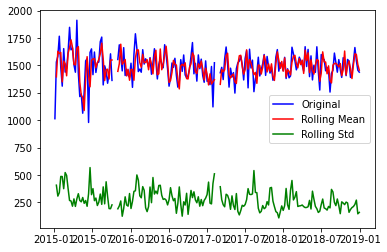

Results of Dickey-Fuller Test:
ADF Statistic: -33.187154
p-value: 0.000000
Critical Values:
1% -3.4358897684764886
5% -2.8639862448409055
10% -2.5680724298154542


In [92]:
# Testing stationarity of store 

test_stationarity(sales)

- The ADF statistic is -33.187154, which is less than the critical value of 1% (-3.43589) and 5% (-2.86399), but more than the critical value of 10% (-2.56807).

- The p-value of 0.000000 is less than the commonly used threshold of 0.05, indicating strong evidence against the null hypothesis, which is that the data is non-stationary.

- In summary, the results suggest that the time series is stationary as the ADF statistic is less than the critical values and the p-value is less than 0.05.

- This means that the mean, variance, and autocorrelation are constant over time. Hence we shall firts use ARIMA for our forecasting

### Arima model

**METRICS**

**1. The Mean Squared Error (MSE)** is a measure of the average of the squares of the errors or deviations of the predictions from the true values. A lower MSE indicates a better fit of the model to the data.

**2. The Mean Absolute Error (MAE)** is a measure of the average of the absolute differences between the predictions and the true values. A lower MAE indicates a better fit of the model to the data.

**3. The Root Mean Squared Error (RMSE)** is the square root of the MSE, and it gives an idea of the absolute magnitude of the errors in the predictions. A lower RMSE indicates a better fit of the model to the data.

**4. The R-Squared Score** is a measure of how well the model explains the variation in the data. A score of 1.0 indicates a perfect fit, and a score of 0.0 indicates no fit. A negative score indicates that the model is a poor fit to the data. The lower the R-squared score, the worse the model is at fitting the data.

In [93]:
# setting the frequency of the sales series data

sales = sales.asfreq('D').dropna()

# fit the SARIMAX model

mod = sm.tsa.statespace.SARIMAX(sales, trend='n', order=(1,1,1), seasonal_order=(1,1,1,12))
res = mod.fit()

# making predictions

start = sales.index.min()
end = sales.index.max()
pred = res.get_prediction(start=start, end=end, dynamic=False)
pred_conf = pred.conf_int()

# Creating trace for actual sales

sales_trace = go.Scatter(x=sales.index, y=sales, name='Actual Sales')

# Creating trace for predicted sales

pred_trace = go.Scatter(x=pred.predicted_mean.index, y=pred.predicted_mean, name='Predicted Sales')

# Creating trace for confidence interval

pred_conf_trace = go.Scatter(x=pred_conf.index, y=pred_conf.iloc[:, 0], fill='tonexty', fillcolor='pink', line=dict(width=0), name='Confidence Interval')

# Creating the data list for the plot

data = [sales_trace, pred_trace, pred_conf_trace]

# Creating the layout for the plot

layout = go.Layout(title="SARIMAX Model Forecast", xaxis_title="Year", yaxis_title="Sales")

# Creating the figure object

fig = go.Figure(data=data, layout=layout)

# Showing plot

fig.show()


C:\Users\Lateef\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lateef\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [94]:
# Getting the predictions

pred_mean = pred.predicted_mean
pred_conf = pred.conf_int()

# Calculating the performance metrics

mse = mean_squared_error(sales, pred_mean)
mae = mean_absolute_error(sales, pred_mean)
rmse = np.sqrt(mse)
r2 = r2_score(sales, pred_mean)


# Printing out the metrics

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)
print("R-Squared Score: ", r2)


Mean Squared Error:  93397.35325235101
Mean Absolute Error:  224.85351847947715
Root Mean Squared Error:  305.6098055566133
R-Squared Score:  -0.11495712307529216


- The results of the SARIMAX model shows that the model has a poor fit to the data as the MSE, MAE, RMSE and R-squared score are relatively high and the R-squared score is negative.

- To try and improve the score, first the model parameters  (trend, order, and seasonal_order) shall be optimized for the model. If this does not work, other features such as temprature, cpi, fuel price data shall be added to the model. 

- If this also fails other models such as linear regression and XGBoost shall be used

In [95]:
# Creating a trace for the actual sales data

sales_trace = go.Scatter(x=sales.index, y=sales, name='Actual Sales')

# Creating a trace for the forecasted sales data

pred_trace = go.Scatter(x=pred_mean.index, y=pred_mean, name='Predicted Sales')

# Creating a list of the traces to be plotted

data = [sales_trace, pred_trace]

# Creating a layout for the plot

layout = go.Layout(title="SARIMAX Model Forecast", xaxis_title="Year", yaxis_title="Sales")

# Creating a Figure object

fig = go.Figure(data=data, layout=layout)

# Showing the plot

fig.show()



**Optimization**

In [96]:
# # optimizing SARIMAX model parameter: ("Order", and "seasonal_order") by performing a parameter grid search


# # define the parameter grid

# param_grid = {'order': [(p, d, q) for p in range(5) for d in range(2) for q in range(5)],
#               'seasonal_order': [(P, D, Q, s) for P in range(2) for D in range(2) for Q in range(2) for s in [12]]}

# # perform grid search

# best_params = None
# best_mse = np.inf
# for params in ParameterGrid(param_grid):
#     try:
#         mod = SARIMAX(sales, trend='n', **params)
#         res = mod.fit()
#         pred = res.predict(start=start, end=end)
#         mse = mean_squared_error(sales, pred)
#         if mse < best_mse:
#             best_params = params
#             best_mse = mse
#     except:
#         continue

# # Printing best parameter and thier MSE score

# print("Best Parameters:", best_params)
# print("Best MSE:", best_mse)


In [97]:
# applying optimized parameters to SARIMAX model

# setting the frequency of the sales series data

sales = sales.asfreq('D').dropna()

# fit the SARIMAX model

mod = sm.tsa.statespace.SARIMAX(sales, trend='c', order=(2, 1, 4), seasonal_order=(1, 0, 1, 12))
res = mod.fit()

# making predictions

start = sales.index.min()
end = sales.index.max()
pred = res.get_prediction(start=start, end=end, dynamic=False)
pred_conf = pred.conf_int()

# Creating trace for actual sales

sales_trace = go.Scatter(x=sales.index, y=sales, name='Actual Sales')

# Creating trace for predicted sales

pred_trace = go.Scatter(x=pred.predicted_mean.index, y=pred.predicted_mean, name='Predicted Sales')

# Creating trace for confidence interval

pred_conf_trace = go.Scatter(x=pred_conf.index, y=pred_conf.iloc[:, 0], fill='tonexty', fillcolor='pink', line=dict(width=0), name='Confidence Interval')

# Creating the data list for the plot

data = [sales_trace, pred_trace, pred_conf_trace]

# Creating the layout for the plot

layout = go.Layout(title="SARIMAX Model Forecast", xaxis_title="Year", yaxis_title="Sales")

# Creating the figure object

fig = go.Figure(data=data, layout=layout)

# Showing plot

fig.show()

C:\Users\Lateef\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lateef\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\Lateef\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [98]:
# Getting the predictions

pred_mean = pred.predicted_mean
pred_conf = pred.conf_int()

# Calculating the performance metrics

mse = mean_squared_error(sales, pred_mean)
mae = mean_absolute_error(sales, pred_mean)
rmse = np.sqrt(mse)
r2 = r2_score(sales, pred_mean)


# Printing out the metrics

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)
print("R-Squared Score: ", r2)


Mean Squared Error:  84589.20234836875
Mean Absolute Error:  215.91746514328332
Root Mean Squared Error:  290.8422293071774
R-Squared Score:  -0.009807349023532419


In [99]:
# Creating a trace for the actual sales data

sales_trace = go.Scatter(x=sales.index, y=sales, name='Actual Sales')

# Creating a trace for the forecasted sales data

pred_trace = go.Scatter(x=pred_mean.index, y=pred_mean, name='Predicted Sales')

# Creating a list of the traces to be plotted

data = [sales_trace, pred_trace]

# Creating a layout for the plot

layout = go.Layout(title="SARIMAX Model Forecast", xaxis_title="Year", yaxis_title="Sales")

# Creating a Figure object

fig = go.Figure(data=data, layout=layout)

# Showing the plot

fig.show()

- The R2_score is still below one, this implies the model has not fitted the data well. Other features shall be added to the model

### Linear Regression

- Linear regression model shall be applied to the data and its performance investigated compared to SARIMAX model

**Data Preparation**

In [100]:
# Dropping unnecessary columns

df_final.drop(columns = ['DayOfMonth', 'OrderId', 'CustomerName', 'Year', 'MonthName', 'DayOfYear', 'WeakOfMonth', 'WeakOfYear', 'DayOfWeek', 'State', 'Month'], inplace=True)

# Previewing columns remaining

df_final.columns

Index(['Category', 'Product', 'City', 'OrderDate', 'Sales', 'Discount',
       'Profit', 'Quarter', 'Cpi', 'DieselPrice', 'Index', 'PetrolPrice',
       'Temprature', 'Holiday'],
      dtype='object')

In [101]:
# Grouping the dataframe by OrderDate and City columns and summing up the Sales and Profit columns and reseting index

df = df_final.groupby(['OrderDate', 'City'])[['Sales', 'Profit']].sum().reset_index()

# Checking the shape of the dataframe

df.shape

(7731, 4)

In [102]:
# Grouping the dataframe by OrderDate and City columns and mean of the Discount column and reseting index

df2 = df_final.groupby(['OrderDate', 'City'])['Discount'].mean().reset_index()

# Checking the shape of the dataframe

df2.shape

(7731, 3)

In [103]:
# Merging the two newly created dataframes into one dataframe on 'OrderDate' and 'City'

merged_df = pd.merge(df, df2, on=['OrderDate', 'City'])

# Checking the shape of the dataframe

merged_df.shape

(7731, 5)

C:\Users\Lateef\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Cpi', ylabel='Density'>

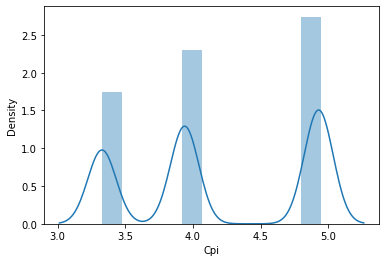

In [104]:
# Distplot of "CPI" column

sns.distplot(df_final['Cpi'])


C:\Users\Lateef\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='DieselPrice', ylabel='Density'>

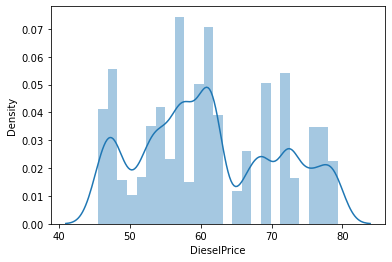

In [105]:
# Distplot of DieselPrice

sns.distplot(df_final['DieselPrice'])

C:\Users\Lateef\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='PetrolPrice', ylabel='Density'>

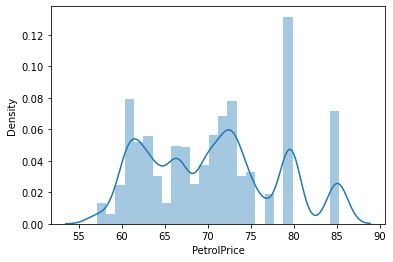

In [106]:
# Distribution plot of petrol price

sns.distplot(df_final['PetrolPrice'])

C:\Users\Lateef\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Temprature', ylabel='Density'>

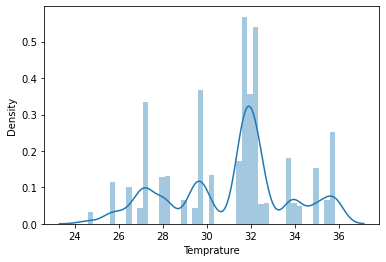

In [107]:
# Distribution plot of Temprature column

sns.distplot(df_final['Temprature'])

In [108]:
# Grouping the dataframe by 'OrderDate' and calculating the mean of the columns 'Cpi', 'DieselPrice', 'PetrolPrice', 'Temprature' and 'Holiday'
# The resulting dataframe 'df3' will have the same dates as index and the mean values of the specified columns

df3 = df_final.groupby(['OrderDate'])[['Cpi', 'DieselPrice', 'PetrolPrice', 'Temprature', 'Holiday']].mean()

# Checking the shape of the resulting dataframe

df3.shape

(1184, 5)

In [109]:
# Merging the 'merged_df' and 'df3' dataframes on the 'OrderDate' column
# The resulting dataframe will have the mean values of 'Cpi', 'DieselPrice', 'PetrolPrice', 'Temprature', 'Holiday' for each date in the 'merged_df' dataframe

df_merged = pd.merge(merged_df, df3, on='OrderDate')

# Checking the shape of the resulting dataframe

df_merged.shape

(7731, 10)

In [110]:
# Checking columns in resulting Dataframe

df_merged.columns

Index(['OrderDate', 'City', 'Sales', 'Profit', 'Discount', 'Cpi',
       'DieselPrice', 'PetrolPrice', 'Temprature', 'Holiday'],
      dtype='object')

In [111]:
# Rearranging columns appropiately

df_merged = df_merged[['OrderDate', 'City', 'Cpi', 'DieselPrice', 'PetrolPrice', 'Temprature', 'Holiday', 'Discount', 'Profit', 'Sales']]

In [112]:
# Displaying first five records of resulting Dataframe

df_merged.head()

OrderDate         City       Cpi  DieselPrice  PetrolPrice  Temprature  \
0 2015-01-03        Salem  4.906973        51.34        61.38       24.58   
1 2015-01-04   Dharmapuri  4.906973        51.34        61.38       24.58   
2 2015-01-04    Nagercoil  4.906973        51.34        61.38       24.58   
3 2015-01-04       Trichy  4.906973        51.34        61.38       24.58   
4 2015-01-05  Tirunelveli  4.906973        51.34        61.38       24.58   

   Holiday  Discount  Profit  Sales  
0        0      0.26  380.16    864  
1        0      0.27  174.57    759  
2        0      0.15  325.28   2033  
3        0      0.32  223.36    698  
4        0      0.35  149.26    878

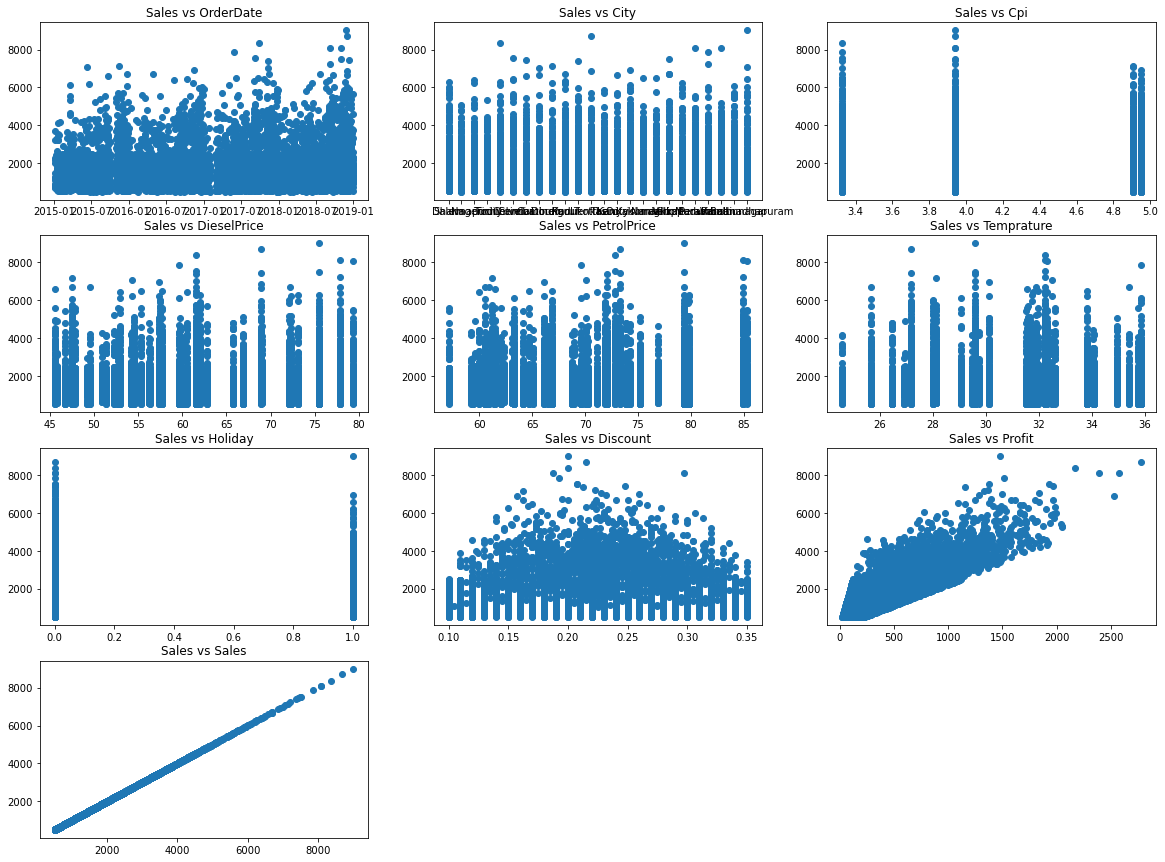

In [113]:
# create a list of columns to plot
cols = df_merged.columns.to_list()

# determine number of rows and columns for subplots
n_cols = 3
n_rows = int(np.ceil(len(cols) / n_cols))

# create a figure with subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20,15))

# flatten the axes array so that it can be iterated through easily
axs = axs.flatten()

# loop through each column and plot a scatter plot on each subplot
for i, col in enumerate(cols):
    axs[i].scatter(df_merged[col], df_merged['Sales'])
    axs[i].set_title(f'Sales vs {col}')

# remove extra empty subplots
for i in range(len(cols), len(axs)):
    fig.delaxes(axs[i])

plt.show()

In [114]:
# Let's transform 'Price' with a log transformation

Log_sales = np.log(df_merged['Sales'])

# Then we add it to our data frame

df_merged['Log_sales'] = Log_sales

# Display first five records of altered data frame

df_merged.head()

OrderDate         City       Cpi  DieselPrice  PetrolPrice  Temprature  \
0 2015-01-03        Salem  4.906973        51.34        61.38       24.58   
1 2015-01-04   Dharmapuri  4.906973        51.34        61.38       24.58   
2 2015-01-04    Nagercoil  4.906973        51.34        61.38       24.58   
3 2015-01-04       Trichy  4.906973        51.34        61.38       24.58   
4 2015-01-05  Tirunelveli  4.906973        51.34        61.38       24.58   

   Holiday  Discount  Profit  Sales  Log_sales  
0        0      0.26  380.16    864   6.761573  
1        0      0.27  174.57    759   6.632002  
2        0      0.15  325.28   2033   7.617268  
3        0      0.32  223.36    698   6.548219  
4        0      0.35  149.26    878   6.777647

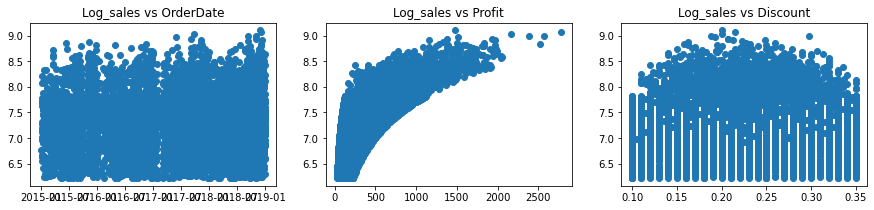

In [115]:
# create a list of columns to plot

cols = ['OrderDate', 'Profit', 'Discount']

# create a figure with subplots

fig, axs = plt.subplots(1, len(cols), figsize=(15,3))

# loop through each column and plot a scatter plot on each subplot

for i, col in enumerate(cols):
    axs[i].scatter(df_merged[col], df_merged['Log_sales'])
    axs[i].set_title(f'Log_sales vs {col}')

# Showing plot

plt.show()

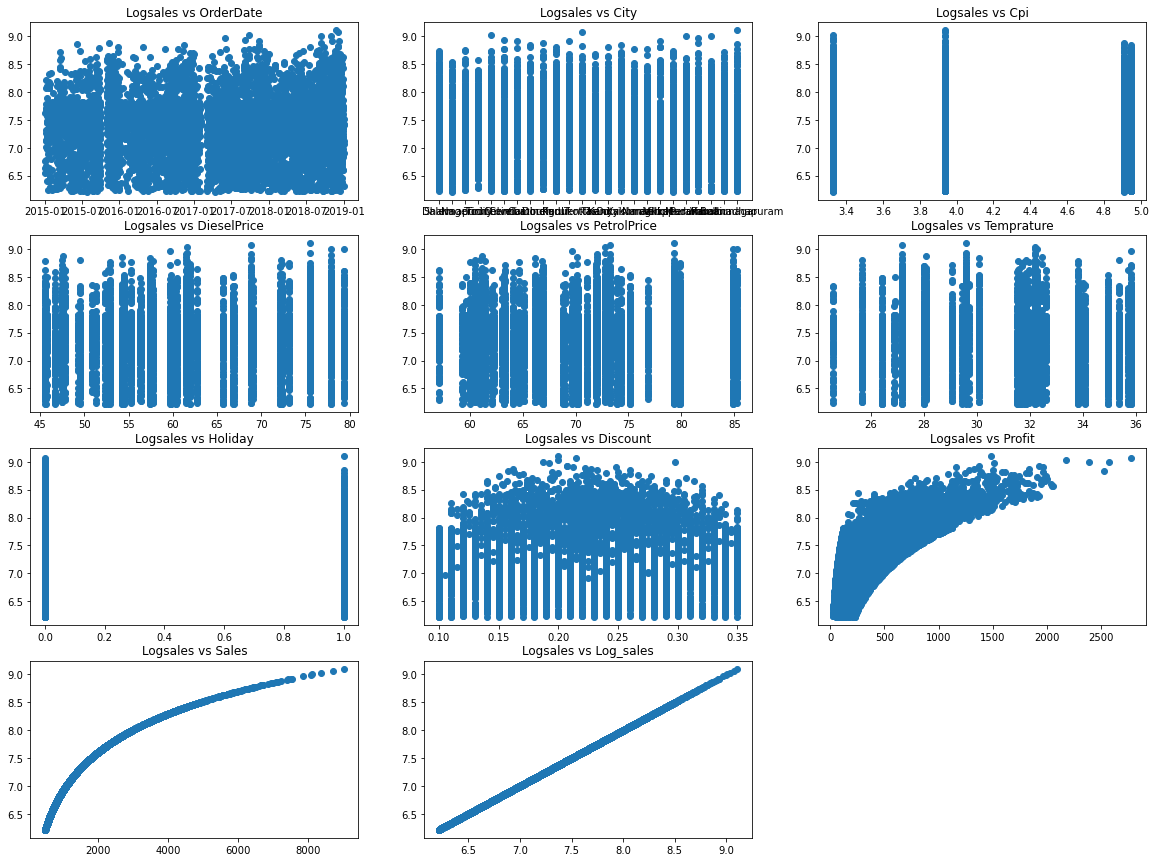

In [116]:
# create a list of columns to plot
cols = df_merged.columns.to_list()

# determine number of rows and columns for subplots
n_cols = 3
n_rows = int(np.ceil(len(cols) / n_cols))

# create a figure with subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20,15))

# flatten the axes array so that it can be iterated through easily
axs = axs.flatten()

# loop through each column and plot a scatter plot on each subplot
for i, col in enumerate(cols):
    axs[i].scatter(df_merged[col], df_merged['Log_sales'])
    axs[i].set_title(f'Logsales vs {col}')

# remove extra empty subplots
for i in range(len(cols), len(axs)):
    fig.delaxes(axs[i])

plt.show()

In [117]:
# dropping order date from dataframe

df_merged = df_merged.drop(['OrderDate'],axis=1)

# Displaying columns of the resulting dataframe

df_merged.columns

Index(['City', 'Cpi', 'DieselPrice', 'PetrolPrice', 'Temprature', 'Holiday',
       'Discount', 'Profit', 'Sales', 'Log_sales'],
      dtype='object')

**Encoding the data** 

- The categorical variables shall be one-hot-encoded

In [118]:
# One-hot encode the categorical variables in the dataframe

df_dummies = pd.get_dummies(df_merged, drop_first=True) # drop_first = True will remove the first category for each variable to avoid perfect multicollinearity

# Display a random sample of 10 rows from the encoded dataframe

df_dummies.sample(10)


Cpi  DieselPrice  PetrolPrice  Temprature  Holiday  Discount  \
1494  4.906973    47.525000    60.540000       25.67        0     0.220   
680   4.906973    52.300000    68.990000       31.88        0     0.265   
4974  3.328173    61.975926    71.897647       27.18        0     0.100   
1689  4.948216    47.852857    57.093333       32.62        0     0.190   
5744  3.938826    69.039474    76.885833       34.95        0     0.220   
4507  3.328173    60.515517    71.121765       32.29        0     0.255   
5418  3.938826    66.818276    75.164118       31.60        1     0.230   
3065  4.948216    57.468333    66.890000       28.01        0     0.280   
2913  4.948216    57.410000    66.160000       30.11        0     0.340   
1361  4.906973    47.525000    60.540000       25.67        0     0.260   

       Profit  Sales  Log_sales  City_Chennai  City_Coimbatore  City_Cumbum  \
1494   334.95   1155   7.051856             0                0            0   
680    720.44   3104   8.040447             0                0            0   
4974   399.90    930   6.835185             0                0            0   
1689    80.73    897   6.799056             0                0            0   
5744   386.40   1288   7.160846             0                0            0   
4507  1138.23   2871   7.962416             0                1            0   
5418   281.97    723   6.583409             0                0            0   
3065   585.00   1300   7.170120             0                0            0   
2913   386.20   1931   7.565793             0                0            1   
1361   448.75   1795   7.492760             0                0            0   

      City_Dharmapuri  City_Dindigul  City_Kanyakumari  City_Karur  \
1494                0              0                 0           0   
680                 0              0                 0           0   
4974                0              0                 0           0   
1689                0              0                 0           0   
5744                0              0                 0           1   
4507                0              0                 0           0   
5418                0              0                 0           0   
3065                1              0                 0           0   
2913                0              0                 0           0   
1361                0              0                 0           0   

      City_Krishnagiri  City_Madurai  City_Nagercoil  City_Namakkal  \
1494                 0             0               0              0   
680                  0             0               0              0   
4974                 0             0               0              0   
1689                 0             0               0              0   
5744                 0             0               0              0   
4507                 0             0               0              0   
5418                 0             1               0              0   
3065                 0             0               0              0   
2913                 0             0               0              0   
1361                 0             0               0              0   

      City_Ooty  City_Perambalur  City_Pudukottai  City_Ramanadhapuram  \
1494          0                0                0                    0   
680           0                0                0                    1   
4974          0                0                0                    0   
1689          0                0                0                    0   
5744          0                0                0                    0   
4507          0                0                0                    0   
5418          0                0                0                    0   
3065          0                0                0                    0   
2913          0                0                0                    0   
1361          0       

In [119]:
# Dropping sales column from df_dummies model 
    
df_ready = df_dummies.drop(['Sales'],axis=1)


# Displaying resulting columns

df_ready.columns

Index(['Cpi', 'DieselPrice', 'PetrolPrice', 'Temprature', 'Holiday',
       'Discount', 'Profit', 'Log_sales', 'City_Chennai', 'City_Coimbatore',
       'City_Cumbum', 'City_Dharmapuri', 'City_Dindigul', 'City_Kanyakumari',
       'City_Karur', 'City_Krishnagiri', 'City_Madurai', 'City_Nagercoil',
       'City_Namakkal', 'City_Ooty', 'City_Perambalur', 'City_Pudukottai',
       'City_Ramanadhapuram', 'City_Salem', 'City_Tenkasi', 'City_Theni',
       'City_Tirunelveli', 'City_Trichy', 'City_Vellore', 'City_Viluppuram',
       'City_Virudhunagar'],
      dtype='object')

**Applying Linear Regression Model**

In [120]:
# The target(s) (dependent variable) is 'log price'

Y = df_ready['Log_sales']

# The inputs are everything BUT the dependent variable, so we can simply drop it

X = df_ready.drop(['Log_sales'],axis=1)

In [121]:
X.columns

Index(['Cpi', 'DieselPrice', 'PetrolPrice', 'Temprature', 'Holiday',
       'Discount', 'Profit', 'City_Chennai', 'City_Coimbatore', 'City_Cumbum',
       'City_Dharmapuri', 'City_Dindigul', 'City_Kanyakumari', 'City_Karur',
       'City_Krishnagiri', 'City_Madurai', 'City_Nagercoil', 'City_Namakkal',
       'City_Ooty', 'City_Perambalur', 'City_Pudukottai',
       'City_Ramanadhapuram', 'City_Salem', 'City_Tenkasi', 'City_Theni',
       'City_Tirunelveli', 'City_Trichy', 'City_Vellore', 'City_Viluppuram',
       'City_Virudhunagar'],
      dtype='object')

In [122]:
# Create a scaler object

scaler = StandardScaler()

# Fit the inputs (calculate the mean and standard deviation feature-wise)

scaler.fit(X)

# Scale the features and store them in a new variable (the actual scaling procedure)

inputs_scaled = scaler.transform(X)

# Split the data into training and test sets (80% of the data will be used for training)

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, Y, test_size=0.2, random_state=365)


In [123]:
# Creating a linear regression object

reg = LinearRegression()

# Fitting the regression model with the scaled TRAIN inputs and targets

reg.fit(x_train,y_train)

LinearRegression()

In [124]:
# Predicting Log_sales values from the train data

y_hat = reg.predict(x_train)

In [125]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
# The closer the points to the 45-degree line, the better the prediction

# Create a scatter plot using the x and y values of y_train and y_hat respectively

scatter = go.Scatter(x=y_train, y=y_hat, mode='markers')

# Define the layout for the plot, including the title and axis labels

layout = go.Layout(title='Targets vs Predictions',
                   xaxis=dict(title='Targets (y_train)', range=[6,13]),
                   yaxis=dict(title='Predictions (y_hat)', range=[6,13]))

# Create the figure using the scatter plot and layout

fig = go.Figure(data=[scatter], layout=layout)

# Display the plot

fig.show()


In [126]:
# Finding the R-squared score of the model

reg.score(x_train,y_train)


0.5271391758372699

In [127]:
# adjusted R-squared
# The adjusted R-squared value takes into account the number of features in the model and adjusts the R-squared value accordingly.
# It gives an idea of how well the model fits the data while considering the complexity of the model.

# This code calculates the adjusted R-squared value 0.5248336623113667 using the formula: 1 - (1-R^2)*(n-1)/(n-p-1)

1 - (1-reg.score(x_train,y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)

0.5248336623113667

**Applying model to test data**

In [128]:
# applying regression model on test data to predict log_sales value

y_hat_test = reg.predict(x_test)

In [129]:
# Create a scatter plot using the x and y values of y_train and y_hat respectively

scatter = go.Scatter(x=y_test, y=y_hat_test, mode='markers')

# Define the layout for the plot, including the title and axis labels

layout = go.Layout(title='Targets vs Predictions',
                   xaxis=dict(title='Targets (y_test)', range=[6,13]),
                   yaxis=dict(title='Predictions (y_hat_test)', range=[6,13]))

# Create the figure using the scatter plot and layout

fig = go.Figure(data=[scatter], layout=layout)

# Display the plot

fig.show()


In [130]:
# Obtaining actual price predictions from log predictions

# Create a dataframe to store the predicted values

df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])

# Add the actual values to the dataframe

df_pf['Target'] = np.exp(y_test)

# Print the first 5 rows of the dataframe

df_pf.head()


Prediction  Target
0  2127.934792     NaN
1  1211.421542     NaN
2  1473.913034     NaN
3  1648.896145     NaN
4  1260.421990     NaN

In [131]:
# adding the actual target values to newly created dataframe

# Adding the actual test values to the dataframe

df_pf['Target'] = np.exp(y_test)

# Print the first 5 rows of the dataframe

df_pf.head()

Prediction  Target
0  2127.934792     NaN
1  1211.421542     NaN
2  1473.913034     NaN
3  1648.896145     NaN
4  1260.421990     NaN

In [132]:
# reseting index and dropping the resulting column

y_test = y_test.reset_index(drop=True)

# Print the first 5 rows of the dataframe

y_test.head()

0    7.723562
1    7.674617
2    7.533159
3    7.033506
4    6.498282
Name: Log_sales, dtype: float64

In [133]:
# Overwriting  the 'Target' column with the appropriate values

# Again, we need the exponential of the test log price

df_pf['Target'] = np.exp(y_test)

# Print the first 5 rows of the dataframe

df_pf.head()

Prediction  Target
0  2127.934792  2261.0
1  1211.421542  2153.0
2  1473.913034  1869.0
3  1648.896145  1134.0
4  1260.421990   664.0

In [134]:
# R-Squared Score

r2 = r2_score(y_test, y_hat_test)

# Printing the score

print("R-Squared Score: ", r2)

R-Squared Score:  0.5320068228198216


## Summary Data Insights

- The Healthy Harvest expereiences it's highest sales turnover on the 4th Quarter.

- The least volume of sales for all product categories is experienced on a Thursday.

- All product categories sold by the healthy haverst are profitable with profit Margins greater than 20%

- Holidays do not affect the Healthy Haversts sales volume. Sales volume in holidays and Non Holidays is almost similar.

- The Healthy Harvest revenue has been increasing rapidly. It experieneced its strongest revenue growth in 2018 with a 33% increase in sales revenue compared to 2017

- All the cities the Healthy Harvest supplies groceries return a profit to the company

## Conclusions

- The Healthy harvest is experiencing strong growth numbers hence applying the our forecasting model will help the company better forecast sales which will mitigate the risk of invetory shortages or excesses. The model will help the company forecast the demand with 52% confidence level.

## Reccomendations

- The Healthy Harvest is reccomended to continue collecting sales data to better improve the models performance. The Healthy harvest can apply the model to forecast orders and hence better manage inventory and reduce wastage.